# Combining Machine Learning with Data-balancing methods for credit scoring

First we import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
#chi squared feature selection
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

First we concudt our experiment on "UCI_Credit_Card" dataset , then we repeat it for two other datasets.

In [ ]:
x = pd.read_csv("UCI_Credit_Card.csv")
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Now let's look at dimension of our dataset:

In [ ]:
features = x.columns.values
features.shape[0]

25

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
training_set = x.sample(frac=0.7, random_state=12)
training_set.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
14944,14945,180000.0,1,3,1,43,-1,-1,-1,-1,...,238.0,218.0,6690.0,15682.0,4699.0,238.0,218.0,6710.0,11949.0,0
14929,14930,170000.0,1,2,2,29,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10895,10896,630000.0,2,1,2,29,0,0,0,0,...,435019.0,329476.0,338557.0,15868.0,12371.0,26454.0,8510.0,11039.0,5390.0,1
12838,12839,300000.0,2,1,2,42,-1,-1,-1,0,...,367.0,-23.0,-413.0,668.0,9800.0,0.0,0.0,0.0,0.0,0
11789,11790,310000.0,1,1,1,39,-1,-1,-2,-1,...,155.0,28100.0,4544.0,0.0,91059.0,155.0,28490.0,0.0,1041.0,0


In [ ]:
testing_set = x.drop(training_set.index)
testing_set.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0
10,11,200000.0,2,3,2,34,0,0,2,0,...,2513.0,1828.0,3731.0,2306.0,12.0,50.0,300.0,3738.0,66.0,0
11,12,260000.0,2,1,2,51,-1,-1,-1,-1,...,8517.0,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0
12,13,630000.0,2,2,2,41,-1,0,-1,-1,...,6500.0,6500.0,2870.0,1000.0,6500.0,6500.0,6500.0,2870.0,0.0,0


In [ ]:
training_set_y = training_set.loc[:, "default.payment.next.month":"default.payment.next.month"]
training_set_y.head()

,default.payment.next.month
14944,0
14929,0
10895,1
12838,0
11789,0


In [ ]:
training_set_x = training_set.loc[:, "ID": "PAY_AMT6"]
training_set_x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14944,14945,180000.0,1,3,1,43,-1,-1,-1,-1,...,4685.0,238.0,218.0,6690.0,15682.0,4699.0,238.0,218.0,6710.0,11949.0
14929,14930,170000.0,1,2,2,29,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10895,10896,630000.0,2,1,2,29,0,0,0,0,...,490093.0,435019.0,329476.0,338557.0,15868.0,12371.0,26454.0,8510.0,11039.0,5390.0
12838,12839,300000.0,2,1,2,42,-1,-1,-1,0,...,9737.0,367.0,-23.0,-413.0,668.0,9800.0,0.0,0.0,0.0,0.0
11789,11790,310000.0,1,1,1,39,-1,-1,-2,-1,...,91059.0,155.0,28100.0,4544.0,0.0,91059.0,155.0,28490.0,0.0,1041.0


In [ ]:
training_set_x.shape

(21000, 24)

1-L1 based feature selection:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(training_set_x, training_set_y)
model = SelectFromModel(lsvc, prefit=True)
training_set_x_L1_selection = model.transform(training_set_x)
training_set_y.shape

(21000, 1)

In [ ]:
coefs_L1 = lsvc.coef_

In [ ]:
names_L1 = lsvc.feature_names_in_

In [ ]:
importance_L1 = {}
for i in range(24):
    importance_L1[names_L1[i]] = abs(coefs_L1[0][i])

In [ ]:
importance_L1 = dict(sorted(importance_L1.items(), key=lambda item: item[1] , reverse=True))

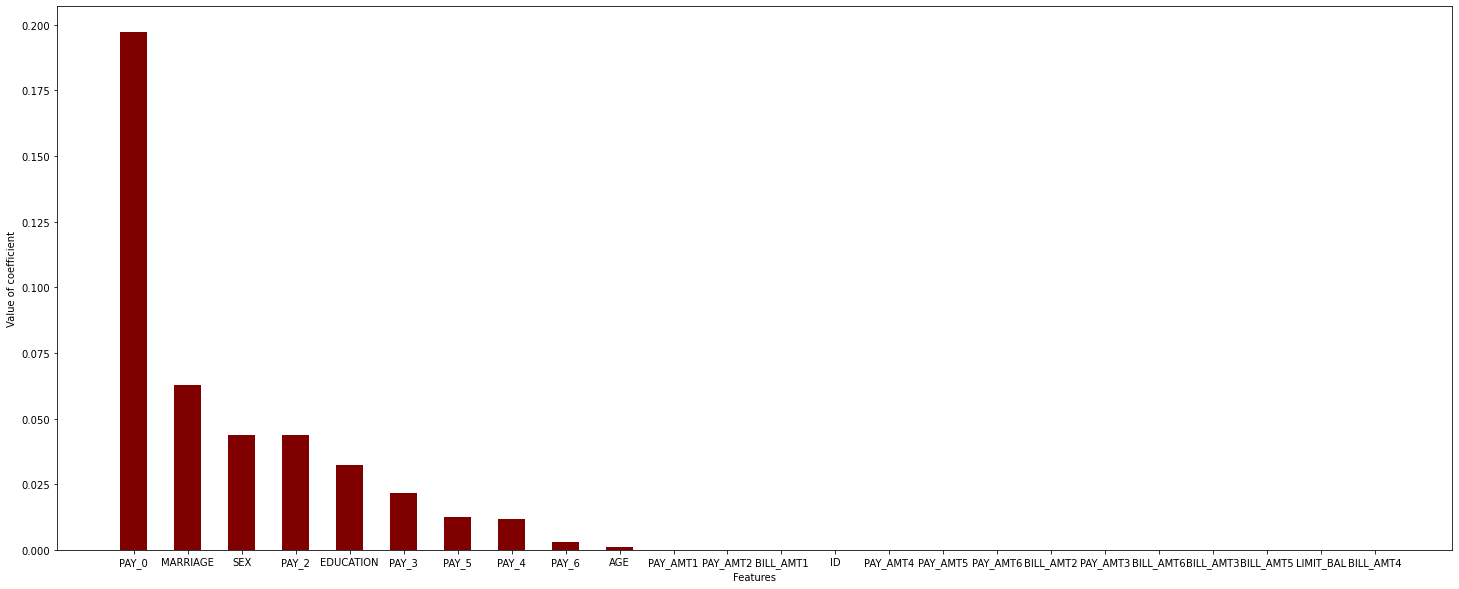

In [ ]:
courses = list(importance_L1.keys())
values = list(importance_L1.values())

fig = plt.figure(figsize = (25, 10))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.5)

plt.xlabel("Features")
plt.ylabel("Value of coefficient")
plt.show()

Now let's apply different balancing techniques:


In [ ]:
import imblearn

Random oversampling:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
training_set_x_L1_selection_over, training_set_y_over = oversample.fit_resample(training_set_x_L1_selection, training_set_y)

In [ ]:
training_set_x_L1_selection_over.shape

(32666, 10)

In [ ]:
training_set_y_over.shape

(32666, 1)

SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE
training_set_x_L1_selection_SMOTE, training_set_y_SMOTE = SMOTE().fit_resample(training_set_x_L1_selection, training_set_y)

In [ ]:
training_set_x_L1_selection_SMOTE.shape

(32666, 10)

In [ ]:
training_set_y_SMOTE.shape

(32666, 1)

SMOTETomek:

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=12)
training_set_x_L1_selection_SMOTETomek, training_set_y_SMOTETomek = smt.fit_resample(training_set_x_L1_selection, training_set_y)

In [ ]:
training_set_x_L1_selection_SMOTETomek.shape

(32544, 10)

In [ ]:
training_set_y_SMOTETomek.shape

(32544, 1)

SMOTE and one sided selection:

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
training_set_x_L1_selection_SMOTE, training_set_y_SMOTE = SMOTE().fit_resample(training_set_x_L1_selection, training_set_y)
Oss = OneSidedSelection(random_state=42)
training_set_x_L1_selection_SMOTE_Oss, training_set_y_SMOTE_Oss = Oss.fit_resample(training_set_x_L1_selection_SMOTE, training_set_y_SMOTE)

In [ ]:
training_set_x_L1_selection_SMOTE_Oss.shape

(32601, 10)

In [ ]:
training_set_y_SMOTE_Oss.shape

(32601, 1)

now lets train our different training datasets on different models:

1-Random Forest:

Training on imbalanced training set:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_L1_selection_imbalanced_RF = RandomForestClassifier(random_state=3)
clf_L1_selection_imbalanced_RF.fit(training_set_x_L1_selection,training_set_y)


RandomForestClassifier(random_state=3)

Training on randomoversampled training set:

In [ ]:
clf_L1_selection_over_RF = RandomForestClassifier(random_state=3)
clf_L1_selection_over_RF.fit(training_set_x_L1_selection_over, training_set_y_over)

RandomForestClassifier(random_state=3)

Training on SMOTE training set:

In [ ]:
clf_L1_selection_SMOTE_RF = RandomForestClassifier(random_state=3)
clf_L1_selection_SMOTE_RF.fit(training_set_x_L1_selection_SMOTE, training_set_y_SMOTE)

RandomForestClassifier(random_state=3)

Training on SMOTETomek training set:

In [ ]:
clf_L1_selection_SMOTETomek_RF = RandomForestClassifier(random_state=3)
clf_L1_selection_SMOTETomek_RF.fit(training_set_x_L1_selection_SMOTETomek, training_set_y_SMOTETomek)

RandomForestClassifier(random_state=3)

Training on SMOTE_oss training set:

In [ ]:
clf_L1_selection_SMOTE_Oss_RF = RandomForestClassifier(random_state=3)
clf_L1_selection_SMOTE_Oss_RF.fit(training_set_x_L1_selection_SMOTE_Oss, training_set_y_SMOTE_Oss)

RandomForestClassifier(random_state=3)

2-Neural Network:

Training on imbalanced training set:

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
clf_L1_selection_imbalanced_NN = Sequential([Dense(units=10, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_L1_selection_imbalanced_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_L1_selection_imbalanced_NN.fit(training_set_x_L1_selection,training_set_y,epochs=100)


Epoch 1/100
657/657 [==============================] - 0s 595us/step - loss: 0.5265
Epoch 2/100
657/657 [==============================] - 0s 598us/step - loss: 0.4796
Epoch 3/100
657/657 [==============================] - 0s 675us/step - loss: 0.4606
Epoch 4/100
657/657 [==============================] - 0s 610us/step - loss: 0.4559
Epoch 5/100
657/657 [==============================] - 0s 617us/step - loss: 0.4527
Epoch 6/100
657/657 [==============================] - 0s 589us/step - loss: 0.4500
Epoch 7/100
657/657 [==============================] - 0s 609us/step - loss: 0.4483
Epoch 8/100
657/657 [==============================] - 0s 614us/step - loss: 0.4471
Epoch 9/100
657/657 [==============================] - 0s 635us/step - loss: 0.4463
Epoch 10/100
657/657 [==============================] - 0s 620us/step - loss: 0.4454
Epoch 11/100
657/657 [==============================] - 0s 692us/step - loss: 0.4452
Epoch 12/100
657/657 [==============================] - 0s 584us/step - lo

657/657 [==============================] - 0s 598us/step - loss: 0.4353
Epoch 97/100
657/657 [==============================] - 0s 608us/step - loss: 0.4350
Epoch 98/100
657/657 [==============================] - 0s 621us/step - loss: 0.4354
Epoch 99/100
657/657 [==============================] - 0s 617us/step - loss: 0.4351
Epoch 100/100
657/657 [==============================] - 0s 620us/step - loss: 0.4351


Training on randomoversampled training set:

In [ ]:
clf_L1_selection_over_NN = Sequential([Dense(units=10, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_L1_selection_over_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_L1_selection_over_NN.fit(training_set_x_L1_selection_over, training_set_y_over,epochs=100)


Epoch 1/100
1021/1021 [==============================] - 1s 639us/step - loss: 0.6420
Epoch 2/100
1021/1021 [==============================] - 1s 640us/step - loss: 0.6001 0s - 
Epoch 3/100
1021/1021 [==============================] - 1s 638us/step - loss: 0.5918
Epoch 4/100
1021/1021 [==============================] - 1s 621us/step - loss: 0.5874 0s - loss: 0.5
Epoch 5/100
1021/1021 [==============================] - 1s 632us/step - loss: 0.5849
Epoch 6/100
1021/1021 [==============================] - 1s 622us/step - loss: 0.5834 0s - loss: 
Epoch 7/100
1021/1021 [==============================] - 1s 620us/step - loss: 0.5824
Epoch 8/100
1021/1021 [==============================] - 1s 639us/step - loss: 0.5816
Epoch 9/100
1021/1021 [==============================] - 1s 617us/step - loss: 0.5809
Epoch 10/100
1021/1021 [==============================] - 1s 623us/step - loss: 0.5803
Epoch 11/100
1021/1021 [==============================] - 1s 638us/step - loss: 0.5797
Epoch 12/100
1021/1

1021/1021 [==============================] - 1s 604us/step - loss: 0.5699 0s - loss: 0.56
Epoch 93/100
1021/1021 [==============================] - 1s 611us/step - loss: 0.5699
Epoch 94/100
1021/1021 [==============================] - 1s 626us/step - loss: 0.5695
Epoch 95/100
1021/1021 [==============================] - 1s 601us/step - loss: 0.5695
Epoch 96/100
1021/1021 [==============================] - 1s 624us/step - loss: 0.5697 0s - loss: 0.569
Epoch 97/100
1021/1021 [==============================] - 1s 632us/step - loss: 0.5696
Epoch 98/100
1021/1021 [==============================] - 1s 605us/step - loss: 0.5696 0s - loss: 0
Epoch 99/100
1021/1021 [==============================] - 1s 612us/step - loss: 0.5696
Epoch 100/100
1021/1021 [==============================] - 1s 615us/step - loss: 0.5697


Training on SMOTE training set:

In [ ]:
clf_L1_selection_SMOTE_NN = Sequential([Dense(units=10, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_L1_selection_SMOTE_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_L1_selection_SMOTE_NN.fit(training_set_x_L1_selection_SMOTE, training_set_y_SMOTE,epochs=100)


Epoch 1/100
1021/1021 [==============================] - 1s 636us/step - loss: 0.6612
Epoch 2/100
1021/1021 [==============================] - 1s 607us/step - loss: 0.6038
Epoch 3/100
1021/1021 [==============================] - 1s 610us/step - loss: 0.5917
Epoch 4/100
1021/1021 [==============================] - 1s 657us/step - loss: 0.5876
Epoch 5/100
1021/1021 [==============================] - 1s 618us/step - loss: 0.5858
Epoch 6/100
1021/1021 [==============================] - 1s 617us/step - loss: 0.5842
Epoch 7/100
1021/1021 [==============================] - 1s 645us/step - loss: 0.5829 0s - loss:
Epoch 8/100
1021/1021 [==============================] - 1s 607us/step - loss: 0.5821
Epoch 9/100
1021/1021 [==============================] - 1s 606us/step - loss: 0.5811
Epoch 10/100
1021/1021 [==============================] - 1s 598us/step - loss: 0.5803
Epoch 11/100
1021/1021 [==============================] - 1s 597us/step - loss: 0.5792
Epoch 12/100
1021/1021 [=================

1021/1021 [==============================] - 1s 624us/step - loss: 0.5654 0s - l
Epoch 94/100
1021/1021 [==============================] - 1s 607us/step - loss: 0.5655
Epoch 95/100
1021/1021 [==============================] - 1s 608us/step - loss: 0.5652
Epoch 96/100
1021/1021 [==============================] - 1s 619us/step - loss: 0.5654
Epoch 97/100
1021/1021 [==============================] - 1s 631us/step - loss: 0.5654 0s - loss: 0.5
Epoch 98/100
1021/1021 [==============================] - 1s 628us/step - loss: 0.5654
Epoch 99/100
1021/1021 [==============================] - 1s 622us/step - loss: 0.5653
Epoch 100/100
1021/1021 [==============================] - 1s 629us/step - loss: 0.5650


Training on SMOTETomek training set:

In [ ]:
clf_L1_selection_SMOTETomek_NN = Sequential([Dense(units=10, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_L1_selection_SMOTETomek_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_L1_selection_SMOTETomek_NN.fit(training_set_x_L1_selection_SMOTETomek, training_set_y_SMOTETomek,epochs=100)

Epoch 1/100
1017/1017 [==============================] - 1s 614us/step - loss: 0.6685 0s - loss: 
Epoch 2/100
1017/1017 [==============================] - 1s 621us/step - loss: 0.6094
Epoch 3/100
1017/1017 [==============================] - 1s 631us/step - loss: 0.5937
Epoch 4/100
1017/1017 [==============================] - 1s 596us/step - loss: 0.5877
Epoch 5/100
1017/1017 [==============================] - 1s 614us/step - loss: 0.5852
Epoch 6/100
1017/1017 [==============================] - 1s 611us/step - loss: 0.5834
Epoch 7/100
1017/1017 [==============================] - 1s 610us/step - loss: 0.5821
Epoch 8/100
1017/1017 [==============================] - 1s 610us/step - loss: 0.5809
Epoch 9/100
1017/1017 [==============================] - 1s 608us/step - loss: 0.5801
Epoch 10/100
1017/1017 [==============================] - 1s 642us/step - loss: 0.5791
Epoch 11/100
1017/1017 [==============================] - 1s 642us/step - loss: 0.5783
Epoch 12/100
1017/1017 [================

1017/1017 [==============================] - 1s 606us/step - loss: 0.5672
Epoch 95/100
1017/1017 [==============================] - 1s 623us/step - loss: 0.5672
Epoch 96/100
1017/1017 [==============================] - 1s 596us/step - loss: 0.5670
Epoch 97/100
1017/1017 [==============================] - 1s 600us/step - loss: 0.5672
Epoch 98/100
1017/1017 [==============================] - 1s 572us/step - loss: 0.5671
Epoch 99/100
1017/1017 [==============================] - 1s 593us/step - loss: 0.5670
Epoch 100/100
1017/1017 [==============================] - 1s 591us/step - loss: 0.5669


Training on SMOTE_Oss training set:

In [ ]:
clf_L1_selection_SMOTE_Oss_NN = Sequential([Dense(units=10, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_L1_selection_SMOTE_Oss_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_L1_selection_SMOTE_Oss_NN.fit(training_set_x_L1_selection_SMOTE_Oss, training_set_y_SMOTE_Oss,epochs=100)

Epoch 1/100
1019/1019 [==============================] - 1s 634us/step - loss: 0.6742
Epoch 2/100
1019/1019 [==============================] - 1s 629us/step - loss: 0.6072
Epoch 3/100
1019/1019 [==============================] - 1s 642us/step - loss: 0.5911 0s - lo
Epoch 4/100
1019/1019 [==============================] - 1s 637us/step - loss: 0.5857
Epoch 5/100
1019/1019 [==============================] - 1s 627us/step - loss: 0.5835
Epoch 6/100
1019/1019 [==============================] - 1s 626us/step - loss: 0.5822
Epoch 7/100
1019/1019 [==============================] - 1s 595us/step - loss: 0.5813
Epoch 8/100
1019/1019 [==============================] - 1s 627us/step - loss: 0.5803
Epoch 9/100
1019/1019 [==============================] - 1s 610us/step - loss: 0.5799
Epoch 10/100
1019/1019 [==============================] - 1s 607us/step - loss: 0.5794
Epoch 11/100
1019/1019 [==============================] - 1s 596us/step - loss: 0.5790
Epoch 12/100
1019/1019 [====================

1019/1019 [==============================] - 1s 588us/step - loss: 0.5670
Epoch 91/100
1019/1019 [==============================] - 1s 601us/step - loss: 0.5671
Epoch 92/100
1019/1019 [==============================] - 1s 610us/step - loss: 0.5670
Epoch 93/100
1019/1019 [==============================] - 1s 607us/step - loss: 0.5669
Epoch 94/100
1019/1019 [==============================] - 1s 608us/step - loss: 0.5668
Epoch 95/100
1019/1019 [==============================] - 1s 611us/step - loss: 0.5667
Epoch 96/100
1019/1019 [==============================] - 1s 609us/step - loss: 0.5668
Epoch 97/100
1019/1019 [==============================] - 1s 623us/step - loss: 0.5669
Epoch 98/100
1019/1019 [==============================] - 1s 618us/step - loss: 0.5665
Epoch 99/100
1019/1019 [==============================] - 1s 619us/step - loss: 0.5666
Epoch 100/100
1019/1019 [==============================] - 1s 604us/step - loss: 0.5668


3-XGBoost:

Training on imbalanced training set:

In [ ]:
from xgboost import XGBClassifier
clf_L1_selection_imbalanced_XGB= XGBClassifier()
clf_L1_selection_imbalanced_XGB.fit(training_set_x_L1_selection,training_set_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on randomoversampled training set:

In [ ]:
clf_L1_selection_over_XGB= XGBClassifier()
clf_L1_selection_over_XGB.fit(training_set_x_L1_selection_over, training_set_y_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on SMOTE training set:

In [ ]:
clf_L1_selection_SMOTE_XGB= XGBClassifier()
clf_L1_selection_SMOTE_XGB.fit(training_set_x_L1_selection_SMOTE, training_set_y_SMOTE)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on SMOTETomek training set:

In [ ]:
clf_L1_selection_SMOTETomek_XGB= XGBClassifier()
clf_L1_selection_SMOTETomek_XGB.fit(training_set_x_L1_selection_SMOTETomek, training_set_y_SMOTETomek)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on SMOTE_Oss training set:

In [ ]:
clf_L1_selection_SMOTE_Oss_XGB= XGBClassifier()
clf_L1_selection_SMOTE_Oss_XGB.fit(training_set_x_L1_selection_SMOTE_Oss, training_set_y_SMOTE_Oss)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

4-Logistic Regression:

Training on imbalanced training set:

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_L1_selection_imbalanced_LR= LogisticRegression(random_state=3)
clf_L1_selection_imbalanced_LR.fit(training_set_x_L1_selection,training_set_y)


LogisticRegression(random_state=3)

Training on randomoversampled training set:

In [ ]:
clf_L1_selection_over_LR= LogisticRegression(random_state=3)
clf_L1_selection_over_LR.fit(training_set_x_L1_selection_over, training_set_y_over)

LogisticRegression(random_state=3)

Training on SMOTE training set:

In [ ]:
clf_L1_selection_SMOTE_LR= LogisticRegression(random_state=3)
clf_L1_selection_SMOTE_LR.fit(training_set_x_L1_selection_SMOTE, training_set_y_SMOTE)

LogisticRegression(random_state=3)

Training on SMOTETomek training set:

In [ ]:
clf_L1_selection_SMOTETomek_LR= LogisticRegression(random_state=3)
clf_L1_selection_SMOTETomek_LR.fit(training_set_x_L1_selection_SMOTETomek, training_set_y_SMOTETomek)

LogisticRegression(random_state=3)

Training on SMOTE_Oss training set:

In [ ]:
clf_L1_selection_SMOTE_Oss_LR= LogisticRegression(random_state=3)
clf_L1_selection_SMOTE_Oss_LR.fit(training_set_x_L1_selection_SMOTE_Oss, training_set_y_SMOTE_Oss)

LogisticRegression(random_state=3)

Now lets measure the performance of our models and visualize them :

Accuracy:

1-L1 based feature selection:

1-Random forest models:

In [ ]:
testing_set_y = testing_set.loc[:, "default.payment.next.month":"default.payment.next.month"]
testing_set_y.head()

,default.payment.next.month
1,1
9,0
10,0
11,0
12,0


In [ ]:
testing_set_y.shape

(9000, 1)

In [ ]:
testing_set_x = testing_set.loc[:, "ID": "PAY_AMT6"]
testing_set_x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0
10,11,200000.0,2,3,2,34,0,0,2,0,...,5535.0,2513.0,1828.0,3731.0,2306.0,12.0,50.0,300.0,3738.0,66.0
11,12,260000.0,2,1,2,51,-1,-1,-1,-1,...,9966.0,8517.0,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0
12,13,630000.0,2,2,2,41,-1,0,-1,-1,...,6500.0,6500.0,6500.0,2870.0,1000.0,6500.0,6500.0,6500.0,2870.0,0.0


In [ ]:
testing_set_x.shape

(9000, 24)

In [ ]:
testing_set_x_L1_selection = model.transform(testing_set_x)

In [ ]:
testing_set_x_L1_selection.shape

(9000, 10)

In [ ]:
y_pred_clf_L1_selection_imbalanced_RF = clf_L1_selection_imbalanced_RF.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_over_RF = clf_L1_selection_over_RF.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTE_RF = clf_L1_selection_SMOTE_RF.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTETomek_RF = clf_L1_selection_SMOTETomek_RF.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTE_Oss_RF = clf_L1_selection_SMOTE_Oss_RF.predict(testing_set_x_L1_selection)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Acc_clf_L1_selection_imbalanced_RF =accuracy_score(testing_set_y, y_pred_clf_L1_selection_imbalanced_RF)
print(Acc_clf_L1_selection_imbalanced_RF)

0.784


In [ ]:
Acc_clf_L1_selection_over_RF =accuracy_score(testing_set_y, y_pred_clf_L1_selection_over_RF)
print(Acc_clf_L1_selection_over_RF)

0.7307777777777777


In [ ]:
Acc_clf_L1_selection_SMOTE_RF =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_RF )
print(Acc_clf_L1_selection_SMOTE_RF)

0.7661111111111111


In [ ]:
Acc_clf_L1_selection_SMOTETomek_RF =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_RF)
print(Acc_clf_L1_selection_SMOTETomek_RF)

0.7686666666666667


In [ ]:
Acc_clf_L1_selection_SMOTE_Oss_RF =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_RF)
print(Acc_clf_L1_selection_SMOTE_Oss_RF)

0.7688888888888888


2-Neural network:

In [ ]:
from tensorflow.keras.metrics import BinaryAccuracy

In [ ]:
logits_clf_L1_selection_imbalanced_NN = clf_L1_selection_imbalanced_NN(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_imbalanced_NN = tf.nn.sigmoid(logits_clf_L1_selection_imbalanced_NN)
y_pred_clf_L1_selection_imbalanced_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_L1_selection_imbalanced_NN.numpy()

array([[0.34030122],
       [0.12738952],
       [0.22639844],
       ...,
       [0.776305  ],
       [0.7600035 ],
       [0.13665414]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_L1_selection_imbalanced_NN)
Acc_clf_L1_selection_imbalanced_NN = m.result().numpy()
print(Acc_clf_L1_selection_imbalanced_NN)

0.81866664


In [ ]:
logits_clf_L1_selection_over_NN = clf_L1_selection_over_NN(testing_set_x_L1_selection)
y_pred_clf_L1_selection_over_NN = tf.nn.sigmoid(logits_clf_L1_selection_over_NN)
y_pred_clf_L1_selection_over_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_L1_selection_over_NN.numpy()

array([[0.7738377 ],
       [0.34115463],
       [0.5936505 ],
       ...,
       [0.91809034],
       [0.9150692 ],
       [0.3274155 ]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_L1_selection_over_NN)
Acc_clf_L1_selection_over_NN = m.result().numpy()
print(Acc_clf_L1_selection_over_NN)

0.7584444


In [ ]:
logits_clf_L1_selection_SMOTE_NN = clf_L1_selection_SMOTE_NN(testing_set_x_L1_selection)
y_pred_clf_L1_selection_SMOTE_NN = tf.nn.sigmoid(logits_clf_L1_selection_SMOTE_NN)
y_pred_clf_L1_selection_SMOTE_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_L1_selection_SMOTE_NN.numpy()

array([[0.65000415],
       [0.32715625],
       [0.5589393 ],
       ...,
       [0.92865086],
       [0.91795695],
       [0.36633202]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_NN)
Acc_clf_L1_selection_SMOTE_NN = m.result().numpy()
print(Acc_clf_L1_selection_SMOTE_NN)

0.76755553


In [ ]:
logits_clf_L1_selection_SMOTETomek_NN = clf_L1_selection_SMOTETomek_NN(testing_set_x_L1_selection)
y_pred_clf_L1_selection_SMOTETomek_NN = tf.nn.sigmoid(logits_clf_L1_selection_SMOTETomek_NN)
y_pred_clf_L1_selection_SMOTETomek_NN.shape


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TensorShape([9000, 1])

In [ ]:
y_pred_clf_L1_selection_SMOTETomek_NN.numpy()

array([[0.60220236],
       [0.38964564],
       [0.53594786],
       ...,
       [0.93620634],
       [0.8861306 ],
       [0.41384098]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTETomek_NN)
Acc_clf_L1_selection_SMOTETomek_NN = m.result().numpy()
print(Acc_clf_L1_selection_SMOTETomek_NN)

0.76033336


In [ ]:
logits_clf_L1_selection_SMOTE_Oss_NN = clf_L1_selection_SMOTE_Oss_NN(testing_set_x_L1_selection)
y_pred_clf_L1_selection_SMOTE_Oss_NN = tf.nn.sigmoid(logits_clf_L1_selection_SMOTE_Oss_NN)
y_pred_clf_L1_selection_SMOTE_Oss_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_L1_selection_SMOTE_Oss_NN.numpy()

array([[0.5573373 ],
       [0.32006508],
       [0.5663804 ],
       ...,
       [0.9322268 ],
       [0.88361275],
       [0.37713718]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_Oss_NN)
Acc_clf_L1_selection_SMOTE_Oss_NN = m.result().numpy()
print(Acc_clf_L1_selection_SMOTE_Oss_NN)

0.77577776


3-XGBoost:

In [ ]:
y_pred_clf_L1_selection_imbalanced_XGB = clf_L1_selection_imbalanced_XGB.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_over_XGB = clf_L1_selection_over_XGB.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTE_XGB = clf_L1_selection_SMOTE_XGB.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTETomek_XGB = clf_L1_selection_SMOTETomek_XGB.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTE_Oss_XGB = clf_L1_selection_SMOTE_Oss_XGB.predict(testing_set_x_L1_selection)

In [ ]:
Acc_clf_L1_selection_imbalanced_XGB =accuracy_score(testing_set_y, y_pred_clf_L1_selection_imbalanced_XGB )
print(Acc_clf_L1_selection_imbalanced_XGB)

0.8133333333333334


In [ ]:
Acc_clf_L1_selection_over_XGB =accuracy_score(testing_set_y, y_pred_clf_L1_selection_over_XGB )
print(Acc_clf_L1_selection_over_XGB)

0.768


In [ ]:
Acc_clf_L1_selection_SMOTE_XGB =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_XGB )
print(Acc_clf_L1_selection_SMOTE_XGB)

0.8095555555555556


In [ ]:
Acc_clf_L1_selection_SMOTETomek_XGB =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_XGB)
print(Acc_clf_L1_selection_SMOTETomek_XGB)

0.8104444444444444


In [ ]:
Acc_clf_L1_selection_SMOTE_Oss_XGB =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_XGB )
print(Acc_clf_L1_selection_SMOTE_Oss_XGB)

0.8107777777777778


4-Logistic regression:

In [ ]:
y_pred_clf_L1_selection_imbalanced_LR = clf_L1_selection_imbalanced_LR.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_over_LR = clf_L1_selection_over_LR.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTE_LR = clf_L1_selection_SMOTE_LR.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTETomek_LR = clf_L1_selection_SMOTETomek_LR.predict(testing_set_x_L1_selection)

In [ ]:
y_pred_clf_L1_selection_SMOTE_Oss_LR = clf_L1_selection_SMOTE_Oss_LR.predict(testing_set_x_L1_selection)

In [ ]:
Acc_clf_L1_selection_imbalanced_LR =accuracy_score(testing_set_y, y_pred_clf_L1_selection_imbalanced_LR)
print(Acc_clf_L1_selection_imbalanced_LR)

0.8076666666666666


In [ ]:
Acc_clf_L1_selection_over_LR =accuracy_score(testing_set_y, y_pred_clf_L1_selection_over_LR )
print(Acc_clf_L1_selection_over_LR)

0.7362222222222222


In [ ]:
Acc_clf_L1_selection_SMOTE_LR =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_LR)
print(Acc_clf_L1_selection_SMOTE_LR)

0.7494444444444445


In [ ]:
Acc_clf_L1_selection_SMOTETomek_LR =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_LR)
print(Acc_clf_L1_selection_SMOTETomek_LR)

0.736


In [ ]:
Acc_clf_L1_selection_SMOTE_Oss_LR =accuracy_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_LR )
print(Acc_clf_L1_selection_SMOTE_Oss_LR)

0.7508888888888889


Sensitivity and specificity:

1-Random forest

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_imbalanced_RF).ravel()
Sensitivity_clf_L1_selection_imbalanced_RF = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_imbalanced_RF)

0.5093214019388516


In [ ]:

Specificity_clf_L1_selection_imbalanced_RF = tn / (tn+fp)
print(Specificity_clf_L1_selection_imbalanced_RF)

0.906414450291566


In [ ]:
#from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_over_RF).ravel()
Sensitivity_clf_L1_selection_over_RF = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_over_RF)


0.39596700274977087


In [ ]:
Specificity_clf_L1_selection_over_RF = tn / (tn+fp)
print(Specificity_clf_L1_selection_over_RF)

0.8125444460247475


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTE_RF).ravel()
Sensitivity_clf_L1_selection_SMOTE_RF = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTE_RF)

0.45685279187817257


In [ ]:
Specificity_clf_L1_selection_SMOTE_RF = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTE_RF)

0.8782534490115204


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_RF).ravel()
Sensitivity_clf_L1_selection_SMOTETomek_RF = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTETomek_RF)

0.46371226718047526


In [ ]:
Specificity_clf_L1_selection_SMOTETomek_RF = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTETomek_RF)

0.8812402218745555


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_RF).ravel()
Sensitivity_clf_L1_selection_SMOTE_Oss_RF = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTE_Oss_RF)

0.4645820038289726


In [ ]:
Specificity_clf_L1_selection_SMOTE_Oss_RF = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTE_Oss_RF)

0.880671312757787


2-Neural network

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.metrics import FalsePositives
from tensorflow.keras.metrics import FalseNegatives
from tensorflow.keras.metrics import TrueNegatives
from tensorflow.keras.metrics import TruePositives

In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_imbalanced_NN)
FP_clf_L1_selection_imbalanced_NN = m.result().numpy()
print(FP_clf_L1_selection_imbalanced_NN)

384.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_imbalanced_NN)
FN_clf_L1_selection_imbalanced_NN = m.result().numpy()
print(FN_clf_L1_selection_imbalanced_NN)

1248.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_imbalanced_NN)
TP_clf_L1_selection_imbalanced_NN = m.result().numpy()
print(TP_clf_L1_selection_imbalanced_NN)

721.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_imbalanced_NN)
TN_clf_L1_selection_imbalanced_NN = m.result().numpy()
print(TN_clf_L1_selection_imbalanced_NN)

6647.0


In [ ]:
Sensitivity_clf_L1_selection_imbalanced_NN = TP_clf_L1_selection_imbalanced_NN / (TP_clf_L1_selection_imbalanced_NN + FN_clf_L1_selection_imbalanced_NN)
print(Sensitivity_clf_L1_selection_imbalanced_NN)

0.3661757


In [ ]:
Specificity_clf_L1_selection_imbalanced_NN = TN_clf_L1_selection_imbalanced_NN / (TN_clf_L1_selection_imbalanced_NN + FP_clf_L1_selection_imbalanced_NN)
print(Specificity_clf_L1_selection_imbalanced_NN)

0.94538474


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_over_NN)
FP_clf_L1_selection_over_NN = m.result().numpy()
print(FP_clf_L1_selection_over_NN)

1383.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_over_NN)
FN_clf_L1_selection_over_NN = m.result().numpy()
print(FN_clf_L1_selection_over_NN)

791.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_over_NN)
TP_clf_L1_selection_over_NN = m.result().numpy()
print(TP_clf_L1_selection_over_NN)

1178.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_over_NN)
TN_clf_L1_selection_over_NN = m.result().numpy()
print(TN_clf_L1_selection_over_NN)

5648.0


In [ ]:
Sensitivity_clf_L1_selection_over_NN = TP_clf_L1_selection_over_NN / (TP_clf_L1_selection_over_NN + FN_clf_L1_selection_over_NN)
print(Sensitivity_clf_L1_selection_over_NN)

0.5982732


In [ ]:
Specificity_clf_L1_selection_over_NN = TN_clf_L1_selection_over_NN / (TN_clf_L1_selection_over_NN + FP_clf_L1_selection_over_NN)
print(Specificity_clf_L1_selection_over_NN)

0.80329967


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_NN)
FP_clf_L1_selection_SMOTE_NN = m.result().numpy()
print(FP_clf_L1_selection_SMOTE_NN)

1271.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_NN)
FN_clf_L1_selection_SMOTE_NN = m.result().numpy()
print(FN_clf_L1_selection_SMOTE_NN)

821.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_NN)
TP_clf_L1_selection_SMOTE_NN = m.result().numpy()
print(TP_clf_L1_selection_SMOTE_NN)

1148.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_NN)
TN_clf_L1_selection_SMOTE_NN = m.result().numpy()
print(TN_clf_L1_selection_SMOTE_NN)

5760.0


In [ ]:
Sensitivity_clf_L1_selection_SMOTE_NN = TP_clf_L1_selection_SMOTE_NN / (TP_clf_L1_selection_SMOTE_NN + FN_clf_L1_selection_SMOTE_NN)
print(Sensitivity_clf_L1_selection_SMOTE_NN)

0.5830371


In [ ]:
Specificity_clf_L1_selection_SMOTE_NN = TN_clf_L1_selection_SMOTE_NN / (TN_clf_L1_selection_SMOTE_NN + FP_clf_L1_selection_SMOTE_NN)
print(Specificity_clf_L1_selection_SMOTE_NN)

0.8192291


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTETomek_NN)
FP_clf_L1_selection_SMOTETomek_NN = m.result().numpy()
print(FP_clf_L1_selection_SMOTETomek_NN)

1337.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTETomek_NN)
FN_clf_L1_selection_SMOTETomek_NN = m.result().numpy()
print(FN_clf_L1_selection_SMOTETomek_NN)

820.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTETomek_NN)
TP_clf_L1_selection_SMOTETomek_NN = m.result().numpy()
print(TP_clf_L1_selection_SMOTETomek_NN)

1149.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTETomek_NN)
TN_clf_L1_selection_SMOTETomek_NN = m.result().numpy()
print(TN_clf_L1_selection_SMOTETomek_NN)

5694.0


In [ ]:
Sensitivity_clf_L1_selection_SMOTETomek_NN = TP_clf_L1_selection_SMOTETomek_NN / (TP_clf_L1_selection_SMOTETomek_NN + FN_clf_L1_selection_SMOTETomek_NN)
print(Sensitivity_clf_L1_selection_SMOTETomek_NN)

0.58354497


In [ ]:
Specificity_clf_L1_selection_SMOTETomek_NN = TN_clf_L1_selection_SMOTETomek_NN / (TN_clf_L1_selection_SMOTETomek_NN + FP_clf_L1_selection_SMOTETomek_NN)
print(Specificity_clf_L1_selection_SMOTETomek_NN)

0.8098421


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_Oss_NN)
FP_clf_L1_selection_SMOTE_Oss_NN = m.result().numpy()
print(FP_clf_L1_selection_SMOTE_Oss_NN)

1159.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_Oss_NN)
FN_clf_L1_selection_SMOTE_Oss_NN = m.result().numpy()
print(FN_clf_L1_selection_SMOTE_Oss_NN)

859.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_Oss_NN)
TP_clf_L1_selection_SMOTE_Oss_NN = m.result().numpy()
print(TP_clf_L1_selection_SMOTE_Oss_NN)

1110.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_Oss_NN)
TN_clf_L1_selection_SMOTE_Oss_NN = m.result().numpy()
print(TN_clf_L1_selection_SMOTE_Oss_NN)

5872.0


In [ ]:
Sensitivity_clf_L1_selection_SMOTE_Oss_NN = TP_clf_L1_selection_SMOTE_Oss_NN / (TP_clf_L1_selection_SMOTE_Oss_NN + FN_clf_L1_selection_SMOTE_Oss_NN)
print(Sensitivity_clf_L1_selection_SMOTE_Oss_NN)

0.5637379


In [ ]:
Specificity_clf_L1_selection_SMOTE_Oss_NN = TN_clf_L1_selection_SMOTE_Oss_NN / (TN_clf_L1_selection_SMOTE_Oss_NN + FP_clf_L1_selection_SMOTE_Oss_NN)
print(Specificity_clf_L1_selection_SMOTE_Oss_NN)

0.8351586


3-XGBoost:

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_imbalanced_XGB).ravel()
Sensitivity_clf_L1_selection_imbalanced_XGB = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_imbalanced_XGB)

0.6317228805834093


In [ ]:

Specificity_clf_L1_selection_imbalanced_XGB = tn / (tn+fp)
print(Specificity_clf_L1_selection_imbalanced_XGB)

0.9425401792063718


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_over_XGB).ravel()
Sensitivity_clf_L1_selection_over_XGB = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_over_XGB)


0.4743202416918429


In [ ]:
Specificity_clf_L1_selection_over_XGB = tn / (tn+fp)
print(Specificity_clf_L1_selection_over_XGB)

0.8267671739439625


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTE_XGB).ravel()
Sensitivity_clf_L1_selection_SMOTE_XGB = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTE_XGB)

0.6054590570719603


In [ ]:
Specificity_clf_L1_selection_SMOTE_XGB = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTE_XGB)

0.9321575878253449


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_XGB).ravel()
Sensitivity_clf_L1_selection_SMOTETomek_XGB = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTETomek_XGB)

0.6084089035449299


In [ ]:
Specificity_clf_L1_selection_SMOTETomek_XGB = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTETomek_XGB)

0.9324420423837292


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_XGB).ravel()
Sensitivity_clf_L1_selection_SMOTE_Oss_XGB = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTE_Oss_XGB)

0.6119528619528619


In [ ]:
Specificity_clf_L1_selection_SMOTE_Oss_XGB = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTE_Oss_XGB)

0.9344332242924193


4-logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_imbalanced_LR).ravel()
Sensitivity_clf_L1_selection_imbalanced_LR = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_imbalanced_LR)

0.6882911392405063


In [ ]:

Specificity_clf_L1_selection_imbalanced_LR = tn / (tn+fp)
print(Specificity_clf_L1_selection_imbalanced_LR)

0.9719812259991466


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_over_LR).ravel()
Sensitivity_clf_L1_selection_over_LR = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_over_LR)


0.42178447276940906


In [ ]:
Specificity_clf_L1_selection_over_LR = tn / (tn+fp)
print(Specificity_clf_L1_selection_over_LR)

0.7870857630493528


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTE_LR).ravel()
Sensitivity_clf_L1_selection_SMOTE_LR = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTE_LR)

0.44095788604459124


In [ ]:
Specificity_clf_L1_selection_SMOTE_LR = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTE_LR)

0.8074242639738302


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_LR).ravel()
Sensitivity_clf_L1_selection_SMOTETomek_LR = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTETomek_LR)

0.4218809980806142


In [ ]:
Specificity_clf_L1_selection_SMOTETomek_LR = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTETomek_LR)

0.7858057175366235


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_LR).ravel()
Sensitivity_clf_L1_selection_SMOTE_Oss_LR = tp / (tp+fp)
print(Sensitivity_clf_L1_selection_SMOTE_Oss_LR)

0.4430538172715895


In [ ]:
Specificity_clf_L1_selection_SMOTE_Oss_LR = tn / (tn+fp)
print(Specificity_clf_L1_selection_SMOTE_Oss_LR)

0.810126582278481


4-AUC ROC

1-Random forest

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
Auc_clf_L1_selection_imbalanced_RF = roc_auc_score(testing_set_y, y_pred_clf_L1_selection_imbalanced_RF)
print(Auc_clf_L1_selection_imbalanced_RF)

0.6266455186958083


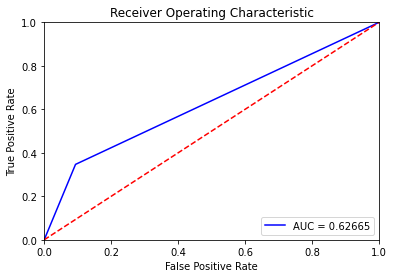

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_imbalanced_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_over_RF =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_over_RF)
print(Auc_clf_L1_selection_over_RF)

0.6256729340331965


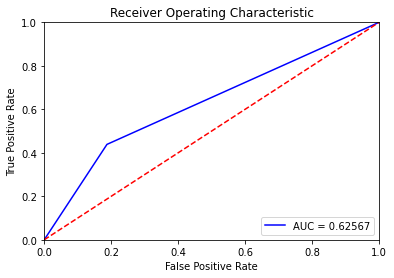

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_over_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTE_RF =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_RF )
print(Auc_clf_L1_selection_SMOTE_RF)

0.6219606503564457


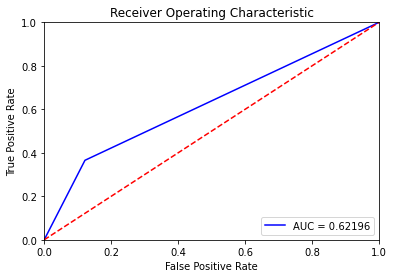

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTE_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTETomek_RF =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_RF)
print(Auc_clf_L1_selection_SMOTETomek_RF)

0.6239619088042152


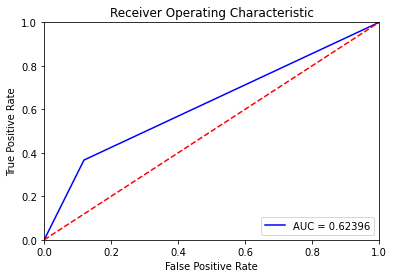

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTE_Oss_RF =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_RF)
print(Auc_clf_L1_selection_SMOTE_Oss_RF)

0.6252010702945867


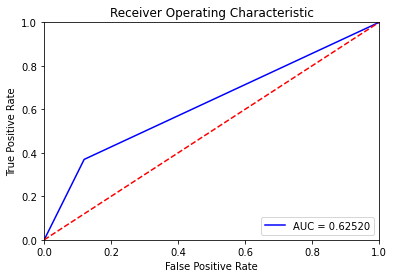

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

2-Neural network

In [ ]:
from tensorflow.keras.metrics import AUC

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_L1_selection_imbalanced_NN)
Auc_clf_L1_selection_imbalanced_NN = m.result().numpy()
print(Auc_clf_L1_selection_imbalanced_NN)


0.74752194


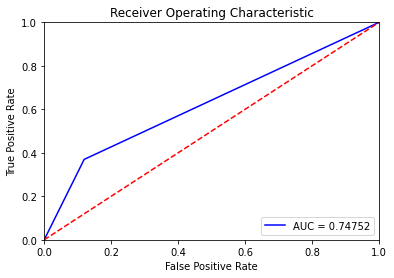

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_L1_selection_imbalanced_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_L1_selection_over_NN)
Auc_clf_L1_selection_over_NN = m.result().numpy()
print(Auc_clf_L1_selection_over_NN)


0.7473274


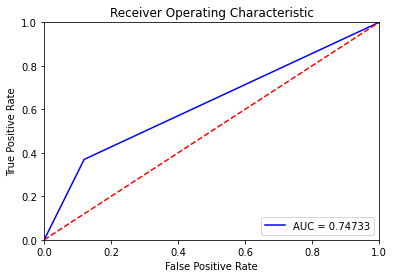

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_L1_selection_over_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_NN)
Auc_clf_L1_selection_SMOTE_NN = m.result().numpy()
print(Auc_clf_L1_selection_SMOTE_NN)


0.74520636


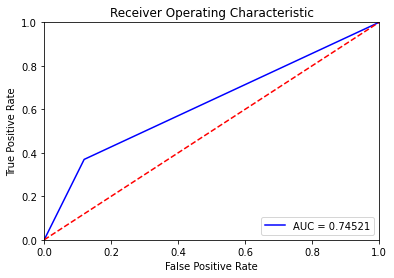

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_L1_selection_SMOTE_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTETomek_NN)
Auc_clf_L1_selection_SMOTETomek_NN = m.result().numpy()
print(Auc_clf_L1_selection_SMOTETomek_NN)


0.7436315


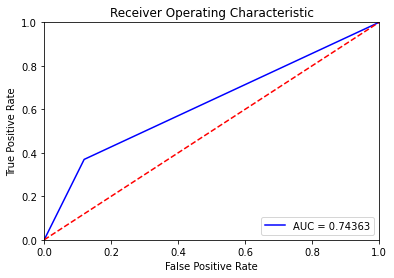

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_L1_selection_SMOTETomek_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_L1_selection_SMOTE_Oss_NN)
Auc_clf_L1_selection_SMOTE_Oss_NN = m.result().numpy()
print(Auc_clf_L1_selection_SMOTE_Oss_NN)


0.7397941


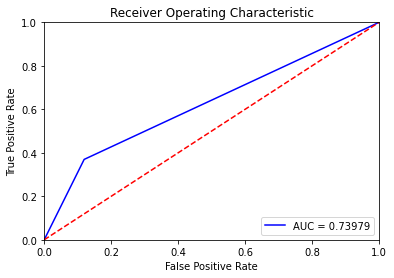

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_L1_selection_SMOTE_Oss_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3-XGBoost

In [ ]:
Auc_clf_L1_selection_imbalanced_XGB = roc_auc_score(testing_set_y, y_pred_clf_L1_selection_imbalanced_XGB)
print(Auc_clf_L1_selection_imbalanced_XGB)

0.6472477432344709


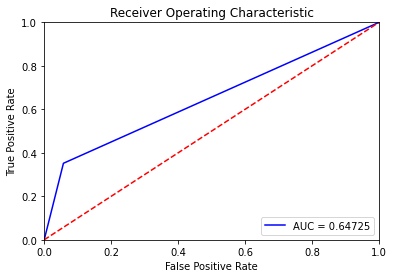

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_imbalanced_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_over_XGB =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_over_XGB)
print(Auc_clf_L1_selection_over_XGB)

0.6924592599024029


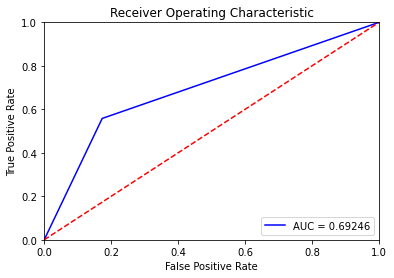

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_over_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTE_XGB =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_XGB )
print(Auc_clf_L1_selection_SMOTE_XGB)

0.6519599518608695


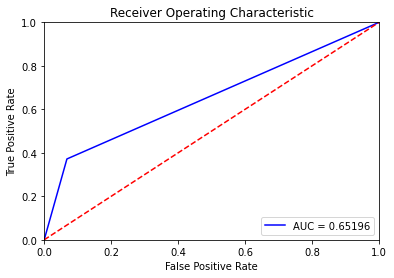

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTE_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTETomek_XGB =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_XGB)
print(Auc_clf_L1_selection_SMOTETomek_XGB)

0.6536257951888174


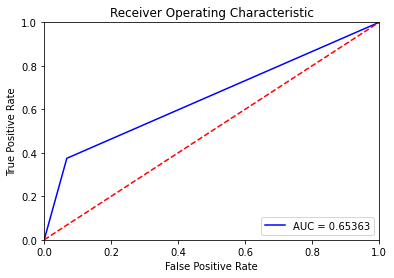

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTE_Oss_XGB =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_XGB)
print(Auc_clf_L1_selection_SMOTE_Oss_XGB)

0.6518280900537768


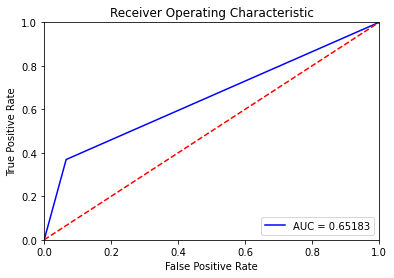

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

4-Logistic Regression

In [ ]:
Auc_clf_L1_selection_imbalanced_LR = roc_auc_score(testing_set_y, y_pred_clf_L1_selection_imbalanced_LR)
print(Auc_clf_L1_selection_imbalanced_LR)

0.5964527765343626


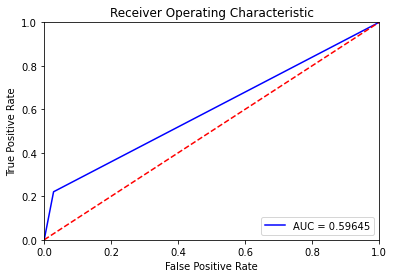

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_imbalanced_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_over_LR =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_over_LR)
print(Auc_clf_L1_selection_over_LR)

0.6708410023982163


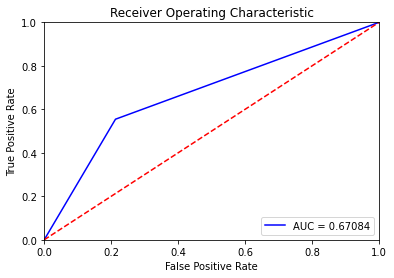

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_over_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTE_LR =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_LR)
print(Auc_clf_L1_selection_SMOTE_LR)

0.674915788665432


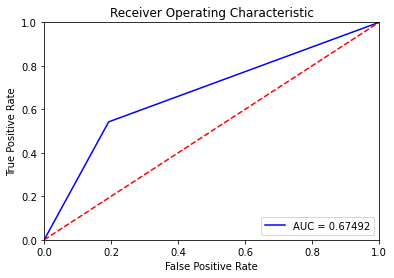

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTE_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTETomek_LR =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_LR)
print(Auc_clf_L1_selection_SMOTETomek_LR)

0.6719785316987333


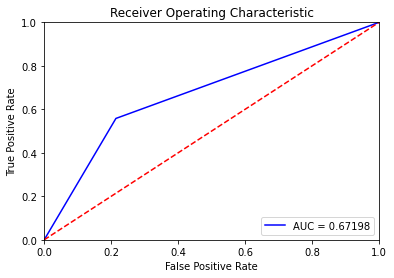

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTETomek_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_L1_selection_SMOTE_Oss_LR =roc_auc_score(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_LR)
print(Auc_clf_L1_selection_SMOTE_Oss_LR)

0.6747433317690017


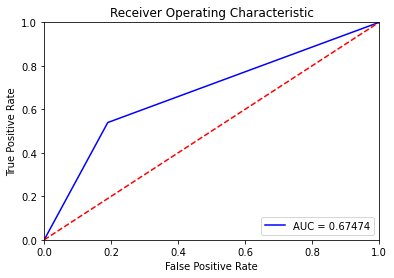

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_L1_selection_SMOTE_Oss_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now lets show everything in a table:

In [ ]:
import pandas as pd

In [ ]:
data = {'Models':  ['RF—imbalanced ', 'RF—RandOverSampling', 'RF—SMOTE' , 'RF—SMOTETomek' , 'RF—SMOTEOss' ,

                   'NN—imbalanced ', 'NN—RandOverSampling', 'NN—SMOTE' , 'NN—SMOTETomek' , 'NN—SMOTEOss',
                    'XGB—imbalanced ', 'XGB—RandOverSampling', 'XGB—SMOTE' , 'XGB—SMOTETomek' , 'XGB—SMOTEOss' ,

                   'LR—imbalanced ', 'LR—RandOverSampling', 'LR—SMOTE' , 'LR—SMOTETomek' , 'LR—SMOTEOss'
                   ],
        'Accuracy': [round(Acc_clf_L1_selection_imbalanced_RF, 3), round(Acc_clf_L1_selection_over_RF , 3), round(Acc_clf_L1_selection_SMOTE_RF, 3),
                    round(Acc_clf_L1_selection_SMOTETomek_RF, 3) , round(Acc_clf_L1_selection_SMOTE_Oss_RF, 3) ,

                    round(Acc_clf_L1_selection_imbalanced_NN, 3), round(Acc_clf_L1_selection_over_NN , 3), round(Acc_clf_L1_selection_SMOTE_NN, 3),
                    round(Acc_clf_L1_selection_SMOTETomek_NN, 3) , round(Acc_clf_L1_selection_SMOTE_Oss_NN, 3),

                     round(Acc_clf_L1_selection_imbalanced_XGB, 3), round(Acc_clf_L1_selection_over_XGB , 3), round(Acc_clf_L1_selection_SMOTE_XGB, 3),
                    round(Acc_clf_L1_selection_SMOTETomek_XGB, 3) , round(Acc_clf_L1_selection_SMOTE_Oss_XGB, 3) ,

                     round(Acc_clf_L1_selection_imbalanced_LR, 3), round(Acc_clf_L1_selection_over_LR , 3), round(Acc_clf_L1_selection_SMOTE_LR, 3),
                    round(Acc_clf_L1_selection_SMOTETomek_LR, 3) , round(Acc_clf_L1_selection_SMOTE_Oss_LR, 3)



                    ],
         'Sensetivity' : [round(Sensitivity_clf_L1_selection_imbalanced_RF, 3) , round( Sensitivity_clf_L1_selection_over_RF, 3),
                         round(Sensitivity_clf_L1_selection_SMOTE_RF , 3) , round(Sensitivity_clf_L1_selection_SMOTETomek_RF, 3) ,
                         round(Sensitivity_clf_L1_selection_SMOTE_Oss_RF , 3) ,

                         round(Sensitivity_clf_L1_selection_imbalanced_NN, 3) , round( Sensitivity_clf_L1_selection_over_NN, 3),
                         round(Sensitivity_clf_L1_selection_SMOTE_NN , 3) , round(Sensitivity_clf_L1_selection_SMOTETomek_NN, 3) ,
                         round(Sensitivity_clf_L1_selection_SMOTE_Oss_NN , 3) ,

                          round(Sensitivity_clf_L1_selection_imbalanced_XGB, 3) , round( Sensitivity_clf_L1_selection_over_XGB, 3),
                         round(Sensitivity_clf_L1_selection_SMOTE_XGB , 3) , round(Sensitivity_clf_L1_selection_SMOTETomek_XGB, 3) ,
                         round(Sensitivity_clf_L1_selection_SMOTE_Oss_XGB , 3) ,

                          round(Sensitivity_clf_L1_selection_imbalanced_LR, 3) , round( Sensitivity_clf_L1_selection_over_LR, 3),
                         round(Sensitivity_clf_L1_selection_SMOTE_LR , 3) , round(Sensitivity_clf_L1_selection_SMOTETomek_LR, 3) ,
                         round(Sensitivity_clf_L1_selection_SMOTE_Oss_LR , 3)






                         ],
        'Specificity' : [round(Specificity_clf_L1_selection_imbalanced_RF, 3) , round(Specificity_clf_L1_selection_over_RF, 3) ,
                        round(Specificity_clf_L1_selection_SMOTE_RF , 3) , round(Specificity_clf_L1_selection_SMOTETomek_RF ,3) ,
                        round(Specificity_clf_L1_selection_SMOTE_Oss_RF , 3) ,


                        round(Specificity_clf_L1_selection_imbalanced_NN, 3) , round(Specificity_clf_L1_selection_over_NN, 3) ,
                        round(Specificity_clf_L1_selection_SMOTE_NN , 3) , round(Specificity_clf_L1_selection_SMOTETomek_NN ,3) ,
                        round(Specificity_clf_L1_selection_SMOTE_Oss_NN , 3) ,

                         round(Specificity_clf_L1_selection_imbalanced_XGB, 3) , round(Specificity_clf_L1_selection_over_XGB, 3) ,
                        round(Specificity_clf_L1_selection_SMOTE_XGB , 3) , round(Specificity_clf_L1_selection_SMOTETomek_XGB ,3) ,
                        round(Specificity_clf_L1_selection_SMOTE_Oss_XGB , 3) ,

                         round(Specificity_clf_L1_selection_imbalanced_LR, 3) , round(Specificity_clf_L1_selection_over_LR, 3) ,
                        round(Specificity_clf_L1_selection_SMOTE_LR , 3) , round(Specificity_clf_L1_selection_SMOTETomek_LR ,3) ,
                        round(Specificity_clf_L1_selection_SMOTE_Oss_LR , 3)






                        ],
        'AUC' : [round(Auc_clf_L1_selection_imbalanced_RF, 3)  , round(Auc_clf_L1_selection_over_RF, 3) , round(Auc_clf_L1_selection_SMOTE_RF , 3),
                round(Auc_clf_L1_selection_SMOTETomek_RF  , 3),round( Auc_clf_L1_selection_SMOTETomek_RF , 3) ,


                 round(Auc_clf_L1_selection_imbalanced_NN, 3)  , round(Auc_clf_L1_selection_over_NN, 3) , round(Auc_clf_L1_selection_SMOTE_NN , 3),
                round(Auc_clf_L1_selection_SMOTETomek_NN  , 3),round( Auc_clf_L1_selection_SMOTETomek_NN , 3) ,


                 round(Auc_clf_L1_selection_imbalanced_XGB, 3)  , round(Auc_clf_L1_selection_over_XGB, 3) , round(Auc_clf_L1_selection_SMOTE_XGB , 3),
                round(Auc_clf_L1_selection_SMOTETomek_XGB  , 3),round( Auc_clf_L1_selection_SMOTETomek_XGB , 3) ,


                 round(Auc_clf_L1_selection_imbalanced_LR, 3)  , round(Auc_clf_L1_selection_over_LR, 3) , round(Auc_clf_L1_selection_SMOTE_LR , 3),
                round(Auc_clf_L1_selection_SMOTETomek_LR  , 3),round( Auc_clf_L1_selection_SMOTETomek_LR , 3) ,









                ]
        }

df = pd.DataFrame(data)

print(df)

                  Models  Accuracy  Sensetivity  Specificity    AUC
0         RF—imbalanced      0.784        0.509        0.906  0.627
1    RF—RandOverSampling     0.731        0.396        0.813  0.626
2               RF—SMOTE     0.766        0.457        0.878  0.622
3          RF—SMOTETomek     0.769        0.464        0.881  0.624
4            RF—SMOTEOss     0.769        0.465        0.881  0.624
5         NN—imbalanced      0.819        0.366        0.945  0.748
6    NN—RandOverSampling     0.758        0.598        0.803  0.747
7               NN—SMOTE     0.768        0.583        0.819  0.745
8          NN—SMOTETomek     0.760        0.584        0.810  0.744
9            NN—SMOTEOss     0.776        0.564        0.835  0.744
10       XGB—imbalanced      0.813        0.632        0.943  0.647
11  XGB—RandOverSampling     0.768        0.474        0.827  0.692
12             XGB—SMOTE     0.810        0.605        0.932  0.652
13        XGB—SMOTETomek     0.810        0.608 

In [ ]:
df.style.format(formatter={('Accuracy'): "{:.3f}",
                           ('Sensetivity'): "{:,.3f}" ,  ('Specificity'): "{:,.3f}" , ('AUC'): "{:,.3f}"
                          })

,Models,Accuracy,Sensetivity,Specificity,AUC
0,RF—imbalanced,0.784,0.509,0.906,0.627
1,RF—RandOverSampling,0.731,0.396,0.813,0.626
2,RF—SMOTE,0.766,0.457,0.878,0.622
3,RF—SMOTETomek,0.769,0.464,0.881,0.624
4,RF—SMOTEOss,0.769,0.465,0.881,0.624
5,NN—imbalanced,0.819,0.366,0.945,0.748
6,NN—RandOverSampling,0.758,0.598,0.803,0.747
7,NN—SMOTE,0.768,0.583,0.819,0.745
8,NN—SMOTETomek,0.760,0.584,0.810,0.744
9,NN—SMOTEOss,0.776,0.564,0.835,0.744


2-Random forest recursive feature elimination:

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe_rf = RFE(RandomForestClassifier())
rfe_rf.fit(training_set_x , training_set_y)
training_set_x_RFE_RF_selection= rfe_rf.transform(training_set_x)
training_set_x_RFE_RF_selection.shape

(21000, 12)

In [ ]:
cls = RandomForestClassifier().fit(training_set_x , training_set_y)
cls.feature_importances_

array([0.07186929, 0.05181458, 0.01084338, 0.01837506, 0.01254633,
       0.0559343 , 0.10683769, 0.04107986, 0.02254023, 0.02756157,
       0.01940882, 0.01661017, 0.05402566, 0.04878744, 0.04797086,
       0.04580237, 0.04530643, 0.04673327, 0.04633947, 0.04417623,
       0.04270499, 0.03977622, 0.04091345, 0.04204233])

In [ ]:
training_set_y.shape

(21000, 1)

In [ ]:
coefs_RFE_RF = cls.feature_importances_

In [ ]:
names_RFE_RF = cls.feature_names_in_

In [ ]:
importance_RFE_RF = {}
for i in range(24):
    importance_RFE_RF[names_RFE_RF[i]] = coefs_RFE_RF[i]

In [ ]:
importance_RFE_RF = dict(sorted(importance_RFE_RF.items(), key=lambda item: item[1] , reverse=True))

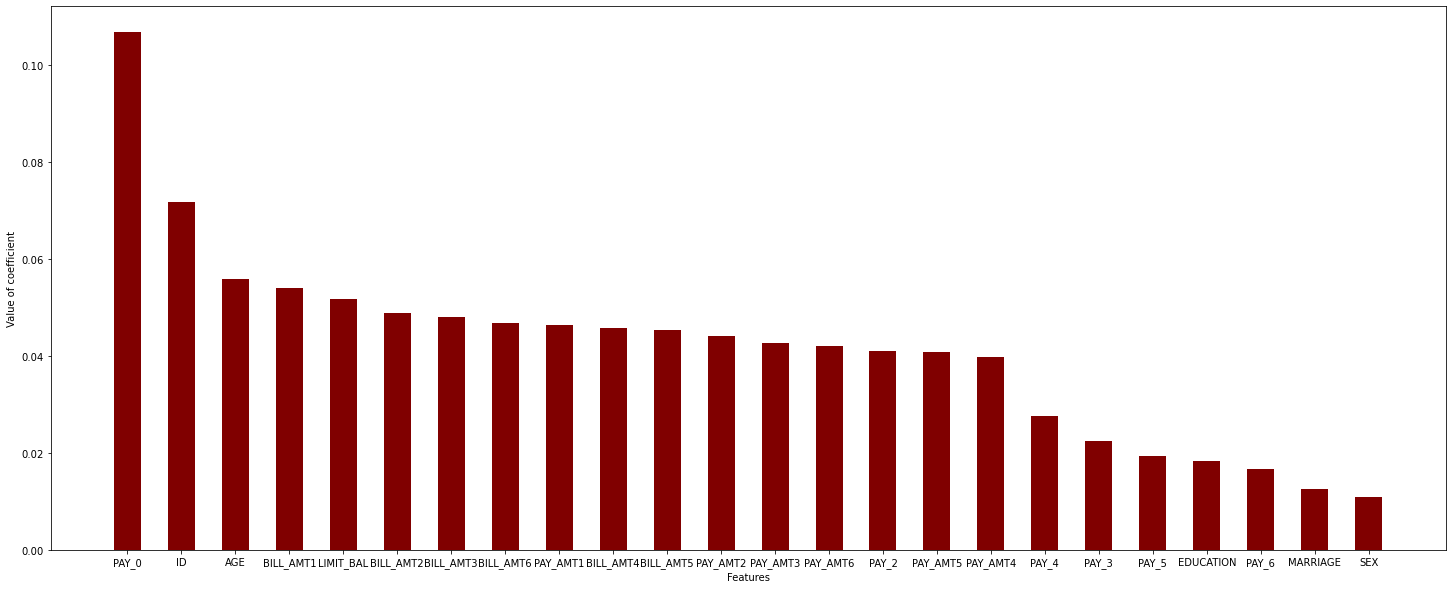

In [ ]:
courses = list(importance_RFE_RF.keys())
values = list(importance_RFE_RF.values())

fig = plt.figure(figsize = (25, 10))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.5)

plt.xlabel("Features")
plt.ylabel("Value of coefficient")
plt.show()

Now let's apply different balancing techniques:

Random oversampling:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
training_set_x_RFE_RF_selection_over, training_set_y_over = oversample.fit_resample(training_set_x_RFE_RF_selection, training_set_y)

In [ ]:
training_set_x_RFE_RF_selection_over.shape

(32666, 12)

In [ ]:
training_set_y_over.shape

(32666, 1)

SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE
training_set_x_RFE_RF_selection_SMOTE, training_set_y_SMOTE = SMOTE().fit_resample(training_set_x_RFE_RF_selection, training_set_y)

In [ ]:
training_set_x_RFE_RF_selection_SMOTE.shape

(32666, 12)

In [ ]:
training_set_y_SMOTE.shape

(32666, 1)

SMOTETomek:

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=12)
training_set_x_RFE_RF_selection_SMOTETomek, training_set_y_SMOTETomek = smt.fit_resample(training_set_x_RFE_RF_selection, training_set_y)

In [ ]:
training_set_x_RFE_RF_selection_SMOTETomek.shape

(31564, 12)

In [ ]:
training_set_y_SMOTETomek.shape

(31564, 1)

SMOTE and one sided selection:

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
training_set_x_RFE_RF_selection_SMOTE, training_set_y_SMOTE = SMOTE().fit_resample(training_set_x_RFE_RF_selection, training_set_y)
Oss = OneSidedSelection(random_state=42)
training_set_x_RFE_RF_selection_SMOTE_Oss, training_set_y_SMOTE_Oss = Oss.fit_resample(training_set_x_RFE_RF_selection_SMOTE, training_set_y_SMOTE)

In [ ]:
training_set_x_RFE_RF_selection_SMOTE_Oss.shape

(32119, 12)

In [ ]:
training_set_y_SMOTE_Oss.shape

(32119, 1)

now lets train our different training datasets on different models:

1-Random Forest:

Training on imbalanced training set:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RFE_RF_selection_imbalanced_RF = RandomForestClassifier(random_state=3)
clf_RFE_RF_selection_imbalanced_RF.fit(training_set_x_RFE_RF_selection, training_set_y)

RandomForestClassifier(random_state=3)

Training on randomoversampled training set:

In [ ]:
clf_RFE_RF_selection_over_RF = RandomForestClassifier(random_state=3)
clf_RFE_RF_selection_over_RF.fit(training_set_x_RFE_RF_selection_over, training_set_y_over)

RandomForestClassifier(random_state=3)

Training on SMOTE training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_RF = RandomForestClassifier(random_state=3)
clf_RFE_RF_selection_SMOTE_RF.fit(training_set_x_RFE_RF_selection_SMOTE, training_set_y_SMOTE)

RandomForestClassifier(random_state=3)

Training on SMOTETomek training set:

In [ ]:
clf_RFE_RF_selection_SMOTETomek_RF = RandomForestClassifier(random_state=3)
clf_RFE_RF_selection_SMOTETomek_RF.fit(training_set_x_RFE_RF_selection_SMOTETomek, training_set_y_SMOTETomek)

RandomForestClassifier(random_state=3)

Training on SMOTE_oss training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_Oss_RF = RandomForestClassifier(random_state=3)
clf_RFE_RF_selection_SMOTE_Oss_RF.fit(training_set_x_RFE_RF_selection_SMOTE_Oss, training_set_y_SMOTE_Oss)

RandomForestClassifier(random_state=3)

2-Neural Network:

Training on imbalanced training set:

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
clf_RFE_RF_selection_imbalanced_NN = Sequential([Dense(units=12, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_RFE_RF_selection_imbalanced_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_RFE_RF_selection_imbalanced_NN.fit(training_set_x_RFE_RF_selection, training_set_y,epochs=100)

Epoch 1/100
657/657 [==============================] - 0s 700us/step - loss: 0.5384
Epoch 2/100
657/657 [==============================] - 0s 662us/step - loss: 0.5273
Epoch 3/100
657/657 [==============================] - 0s 575us/step - loss: 0.5257
Epoch 4/100
657/657 [==============================] - 0s 615us/step - loss: 0.5237
Epoch 5/100
657/657 [==============================] - 0s 726us/step - loss: 0.5228
Epoch 6/100
657/657 [==============================] - 0s 617us/step - loss: 0.5230
Epoch 7/100
657/657 [==============================] - 0s 593us/step - loss: 0.5231
Epoch 8/100
657/657 [==============================] - 0s 646us/step - loss: 0.5228
Epoch 9/100
657/657 [==============================] - 0s 574us/step - loss: 0.5226
Epoch 10/100
657/657 [==============================] - 0s 609us/step - loss: 0.5225
Epoch 11/100
657/657 [==============================] - 0s 571us/step - loss: 0.5225
Epoch 12/100
657/657 [==============================] - 0s 569us/step - lo

657/657 [==============================] - 0s 616us/step - loss: 0.5284
Epoch 94/100
657/657 [==============================] - 0s 633us/step - loss: 0.5284
Epoch 95/100
657/657 [==============================] - 0s 638us/step - loss: 0.5284
Epoch 96/100
657/657 [==============================] - 0s 647us/step - loss: 0.5284
Epoch 97/100
657/657 [==============================] - 0s 643us/step - loss: 0.5284
Epoch 98/100
657/657 [==============================] - 0s 625us/step - loss: 0.5284
Epoch 99/100
657/657 [==============================] - 0s 631us/step - loss: 0.5284
Epoch 100/100
657/657 [==============================] - 0s 633us/step - loss: 0.5285


Training on randomoversampled training set:

In [ ]:
clf_RFE_RF_selection_over_NN = Sequential([Dense(units=12, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_RFE_RF_selection_over_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_RFE_RF_selection_over_NN.fit(training_set_x_RFE_RF_selection_over, training_set_y_over,epochs=100)

Epoch 1/100
1021/1021 [==============================] - 1s 640us/step - loss: 0.6820
Epoch 2/100
1021/1021 [==============================] - 1s 649us/step - loss: 0.6754
Epoch 3/100
1021/1021 [==============================] - 1s 637us/step - loss: 0.6739
Epoch 4/100
1021/1021 [==============================] - 1s 635us/step - loss: 0.6730
Epoch 5/100
1021/1021 [==============================] - 1s 625us/step - loss: 0.6726
Epoch 6/100
1021/1021 [==============================] - 1s 660us/step - loss: 0.6712
Epoch 7/100
1021/1021 [==============================] - 1s 687us/step - loss: 0.6711 0s - loss: 
Epoch 8/100
1021/1021 [==============================] - 1s 631us/step - loss: 0.6718
Epoch 9/100
1021/1021 [==============================] - 1s 697us/step - loss: 0.6706
Epoch 10/100
1021/1021 [==============================] - 1s 784us/step - loss: 0.6703
Epoch 11/100
1021/1021 [==============================] - 1s 633us/step - loss: 0.6707
Epoch 12/100
1021/1021 [================

Epoch 92/100
1021/1021 [==============================] - 1s 613us/step - loss: 0.6727
Epoch 93/100
1021/1021 [==============================] - 1s 624us/step - loss: 0.6727
Epoch 94/100
1021/1021 [==============================] - 1s 649us/step - loss: 0.6730 0s - loss:
Epoch 95/100
1021/1021 [==============================] - 1s 635us/step - loss: 0.6733 0s - loss: 0.67 - ETA: 0s - loss: 
Epoch 96/100
1021/1021 [==============================] - 1s 648us/step - loss: 0.6729
Epoch 97/100
1021/1021 [==============================] - 1s 604us/step - loss: 0.6699
Epoch 98/100
1021/1021 [==============================] - 1s 645us/step - loss: 0.6725
Epoch 99/100
1021/1021 [==============================] - 1s 634us/step - loss: 0.6717
Epoch 100/100
1021/1021 [==============================] - 1s 641us/step - loss: 0.6695


Training on SMOTE training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_NN = Sequential([Dense(units=12, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_RFE_RF_selection_SMOTE_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_RFE_RF_selection_SMOTE_NN.fit(training_set_x_RFE_RF_selection_SMOTE, training_set_y_SMOTE,epochs=100)

Epoch 1/100
1021/1021 [==============================] - 1s 654us/step - loss: 0.6870
Epoch 2/100
1021/1021 [==============================] - 1s 659us/step - loss: 0.6786
Epoch 3/100
1021/1021 [==============================] - 1s 635us/step - loss: 0.6754
Epoch 4/100
1021/1021 [==============================] - 1s 631us/step - loss: 0.6732
Epoch 5/100
1021/1021 [==============================] - 1s 645us/step - loss: 0.6729 0s - loss: 0
Epoch 6/100
1021/1021 [==============================] - 1s 671us/step - loss: 0.6734
Epoch 7/100
1021/1021 [==============================] - 1s 621us/step - loss: 0.6741
Epoch 8/100
1021/1021 [==============================] - 1s 651us/step - loss: 0.6748
Epoch 9/100
1021/1021 [==============================] - 1s 646us/step - loss: 0.6743
Epoch 10/100
1021/1021 [==============================] - 1s 635us/step - loss: 0.6754
Epoch 11/100
1021/1021 [==============================] - 1s 616us/step - loss: 0.6763 0s - loss: 0.676 - ETA: 0s - loss:
Epoc

1021/1021 [==============================] - 1s 625us/step - loss: 0.6651
Epoch 92/100
1021/1021 [==============================] - 1s 633us/step - loss: 0.6652
Epoch 93/100
1021/1021 [==============================] - 1s 635us/step - loss: 0.6670
Epoch 94/100
1021/1021 [==============================] - 1s 640us/step - loss: 0.6662 0s - loss:  - ETA: 0s - loss: 0
Epoch 95/100
1021/1021 [==============================] - ETA: 0s - loss: 0.665 - 1s 641us/step - loss: 0.6654
Epoch 96/100
1021/1021 [==============================] - 1s 635us/step - loss: 0.6648
Epoch 97/100
1021/1021 [==============================] - 1s 620us/step - loss: 0.6656 0s - loss: 0.6
Epoch 98/100
1021/1021 [==============================] - 1s 622us/step - loss: 0.6683
Epoch 99/100
1021/1021 [==============================] - 1s 626us/step - loss: 0.6712
Epoch 100/100
1021/1021 [==============================] - 1s 617us/step - loss: 0.6685 0s - loss: 0.671 - ETA: 0s - los


Training on SMOTETomek training set:

In [ ]:
clf_RFE_RF_selection_SMOTETomek_NN = Sequential([Dense(units=12, activation='sigmoid') , Dense(units=6, activation='sigmoid'),Dense(units=1, activation='linear')])
clf_RFE_RF_selection_SMOTETomek_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_RFE_RF_selection_SMOTETomek_NN.fit(training_set_x_RFE_RF_selection_SMOTETomek, training_set_y_SMOTETomek,epochs=100)

Epoch 1/100
987/987 [==============================] - 1s 664us/step - loss: 0.6884
Epoch 2/100
987/987 [==============================] - 1s 631us/step - loss: 0.6843
Epoch 3/100
987/987 [==============================] - 1s 630us/step - loss: 0.6821
Epoch 4/100
987/987 [==============================] - 1s 645us/step - loss: 0.6809 0s - loss: 0.
Epoch 5/100
987/987 [==============================] - 1s 601us/step - loss: 0.6802
Epoch 6/100
987/987 [==============================] - 1s 619us/step - loss: 0.6790
Epoch 7/100
987/987 [==============================] - 1s 641us/step - loss: 0.6786
Epoch 8/100
987/987 [==============================] - 1s 627us/step - loss: 0.6786
Epoch 9/100
987/987 [==============================] - 1s 625us/step - loss: 0.6783 0s - loss: 0.678
Epoch 10/100
987/987 [==============================] - 1s 625us/step - loss: 0.6776
Epoch 11/100
987/987 [==============================] - 1s 617us/step - loss: 0.6781
Epoch 12/100
987/987 [=====================

Epoch 94/100
987/987 [==============================] - 1s 703us/step - loss: 0.6810 0s - l
Epoch 95/100
987/987 [==============================] - 1s 677us/step - loss: 0.6812
Epoch 96/100
987/987 [==============================] - 1s 652us/step - loss: 0.6812
Epoch 97/100
987/987 [==============================] - 1s 714us/step - loss: 0.6813
Epoch 98/100
987/987 [==============================] - 1s 652us/step - loss: 0.6813
Epoch 99/100
987/987 [==============================] - 1s 608us/step - loss: 0.6811
Epoch 100/100
987/987 [==============================] - 1s 682us/step - loss: 0.6812 0s - loss: 0.681


Training on SMOTE_Oss training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_Oss_NN = Sequential([Dense(units=12, activation='sigmoid') , Dense(units=6,activation='sigmoid'),Dense(units=1, activation='linear')])
clf_RFE_RF_selection_SMOTE_Oss_NN.compile(loss=BinaryCrossentropy(from_logits=True))
clf_RFE_RF_selection_SMOTE_Oss_NN.fit(training_set_x_RFE_RF_selection_SMOTE_Oss, training_set_y_SMOTE_Oss,epochs=100)

Epoch 1/100
1004/1004 [==============================] - 1s 740us/step - loss: 0.6892
Epoch 2/100
1004/1004 [==============================] - 1s 689us/step - loss: 0.6842
Epoch 3/100
1004/1004 [==============================] - 1s 699us/step - loss: 0.6825
Epoch 4/100
1004/1004 [==============================] - 1s 701us/step - loss: 0.6813
Epoch 5/100
1004/1004 [==============================] - 1s 752us/step - loss: 0.6814
Epoch 6/100
1004/1004 [==============================] - 1s 730us/step - loss: 0.6799
Epoch 7/100
1004/1004 [==============================] - 1s 600us/step - loss: 0.6780 0s - loss: 0.678
Epoch 8/100
1004/1004 [==============================] - 1s 647us/step - loss: 0.6770
Epoch 9/100
1004/1004 [==============================] - 1s 680us/step - loss: 0.6765
Epoch 10/100
1004/1004 [==============================] - 1s 675us/step - loss: 0.6771
Epoch 11/100
1004/1004 [==============================] - 1s 674us/step - loss: 0.6759
Epoch 12/100
1004/1004 [===========

1004/1004 [==============================] - 1s 651us/step - loss: 0.6700
Epoch 93/100
1004/1004 [==============================] - 1s 641us/step - loss: 0.6701
Epoch 94/100
1004/1004 [==============================] - 1s 638us/step - loss: 0.6709 0s - lo
Epoch 95/100
1004/1004 [==============================] - 1s 624us/step - loss: 0.6692
Epoch 96/100
1004/1004 [==============================] - 1s 640us/step - loss: 0.6715
Epoch 97/100
1004/1004 [==============================] - 1s 592us/step - loss: 0.6718
Epoch 98/100
1004/1004 [==============================] - 1s 605us/step - loss: 0.6730 0s - loss
Epoch 99/100
1004/1004 [==============================] - 1s 626us/step - loss: 0.6733
Epoch 100/100
1004/1004 [==============================] - ETA: 0s - loss: 0.673 - 1s 651us/step - loss: 0.6729


3-XGBoost:

Training on imbalanced training set:

In [ ]:
from xgboost import XGBClassifier
clf_RFE_RF_selection_imbalanced_XGB= XGBClassifier()
clf_RFE_RF_selection_imbalanced_XGB.fit(training_set_x_RFE_RF_selection, training_set_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on randomoversampled training set:

In [ ]:
clf_RFE_RF_selection_over_XGB= XGBClassifier()
clf_RFE_RF_selection_over_XGB.fit(training_set_x_RFE_RF_selection_over, training_set_y_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on SMOTE training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_XGB= XGBClassifier()
clf_RFE_RF_selection_SMOTE_XGB.fit(training_set_x_RFE_RF_selection_SMOTE, training_set_y_SMOTE)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on SMOTETomek training set:

In [ ]:
clf_RFE_RF_selection_SMOTETomek_XGB= XGBClassifier()
clf_RFE_RF_selection_SMOTETomek_XGB.fit(training_set_x_RFE_RF_selection_SMOTETomek, training_set_y_SMOTETomek)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training on SMOTE_Oss training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_Oss_XGB= XGBClassifier()
clf_RFE_RF_selection_SMOTE_Oss_XGB.fit(training_set_x_RFE_RF_selection_SMOTE_Oss, training_set_y_SMOTE_Oss)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

4-Logistic Regression:

Training on imbalanced training set:

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_RFE_RF_selection_imbalanced_LR= LogisticRegression(random_state=3)
clf_RFE_RF_selection_imbalanced_LR.fit(training_set_x_RFE_RF_selection, training_set_y)

LogisticRegression(random_state=3)

Training on randomoversampled training set:

In [ ]:
clf_RFE_RF_selection_over_LR= LogisticRegression(random_state=3)
clf_RFE_RF_selection_over_LR.fit(training_set_x_RFE_RF_selection_over, training_set_y_over)

LogisticRegression(random_state=3)

Training on SMOTE training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_LR= LogisticRegression(random_state=3)
clf_RFE_RF_selection_SMOTE_LR.fit(training_set_x_RFE_RF_selection_SMOTE, training_set_y_SMOTE)

LogisticRegression(random_state=3)

Training on SMOTETomek training set:

In [ ]:
clf_RFE_RF_selection_SMOTETomek_LR= LogisticRegression(random_state=3)
clf_RFE_RF_selection_SMOTETomek_LR.fit(training_set_x_RFE_RF_selection_SMOTETomek, training_set_y_SMOTETomek)

LogisticRegression(random_state=3)

Training on SMOTE_Oss training set:

In [ ]:
clf_RFE_RF_selection_SMOTE_Oss_LR= LogisticRegression(random_state=3)
clf_RFE_RF_selection_SMOTE_Oss_LR.fit(training_set_x_RFE_RF_selection_SMOTE_Oss, training_set_y_SMOTE_Oss)

LogisticRegression(random_state=3)

Now lets measure the performance of our models and visualize them :

Accuracy:

1-Random forest models:

In [ ]:
testing_set_y = testing_set.loc[:, "default.payment.next.month":"default.payment.next.month"]
testing_set_y.head()

,default.payment.next.month
1,1
9,0
10,0
11,0
12,0


In [ ]:
testing_set_y.shape

(9000, 1)

In [ ]:
testing_set_x = testing_set.loc[:, "ID": "PAY_AMT6"]
testing_set_x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0
10,11,200000.0,2,3,2,34,0,0,2,0,...,5535.0,2513.0,1828.0,3731.0,2306.0,12.0,50.0,300.0,3738.0,66.0
11,12,260000.0,2,1,2,51,-1,-1,-1,-1,...,9966.0,8517.0,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0
12,13,630000.0,2,2,2,41,-1,0,-1,-1,...,6500.0,6500.0,6500.0,2870.0,1000.0,6500.0,6500.0,6500.0,2870.0,0.0


In [ ]:
testing_set_x.shape

(9000, 24)

In [ ]:
testing_set_x_RFE_RF_selection = rfe_rf.transform(testing_set_x)

In [ ]:
testing_set_x_RFE_RF_selection.shape

(9000, 12)

In [ ]:
y_pred_clf_RFE_RF_selection_imbalanced_RF = clf_RFE_RF_selection_imbalanced_RF.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_over_RF = clf_RFE_RF_selection_over_RF.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_RF = clf_RFE_RF_selection_SMOTE_RF.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTETomek_RF = clf_RFE_RF_selection_SMOTETomek_RF.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_Oss_RF = clf_RFE_RF_selection_SMOTE_Oss_RF.predict(testing_set_x_RFE_RF_selection)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Acc_clf_RFE_RF_selection_imbalanced_RF =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_RF)
print(Acc_clf_RFE_RF_selection_imbalanced_RF)

0.8134444444444444


In [ ]:
Acc_clf_RFE_RF_selection_over_RF =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_over_RF)
print(Acc_clf_RFE_RF_selection_over_RF)

0.8098888888888889


In [ ]:
Acc_clf_RFE_RF_selection_SMOTE_RF =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_RF )
print(Acc_clf_RFE_RF_selection_SMOTE_RF)

0.8053333333333333


In [ ]:
Acc_clf_RFE_RF_selection_SMOTETomek_RF =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_RF)
print(Acc_clf_RFE_RF_selection_SMOTETomek_RF)

0.8068888888888889


In [ ]:
Acc_clf_RFE_RF_selection_SMOTE_Oss_RF =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_RF)
print(Acc_clf_RFE_RF_selection_SMOTE_Oss_RF)

0.8048888888888889


2-Neural network:

In [ ]:
from tensorflow.keras.metrics import BinaryAccuracy

In [ ]:
logits_clf_RFE_RF_selection_imbalanced_NN = clf_RFE_RF_selection_imbalanced_NN(testing_set_x_RFE_RF_selection)

In [ ]:
logits_clf_RFE_RF_selection_imbalanced_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_RFE_RF_selection_imbalanced_NN = tf.nn.sigmoid(logits_clf_RFE_RF_selection_imbalanced_NN)
y_pred_clf_RFE_RF_selection_imbalanced_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_RFE_RF_selection_imbalanced_NN.numpy()

array([[0.21856105],
       [0.21856105],
       [0.21856105],
       ...,
       [0.21856105],
       [0.32747668],
       [0.21856105]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_imbalanced_NN)
Acc_clf_RFE_RF_selection_imbalanced_NN = m.result().numpy()
print(Acc_clf_RFE_RF_selection_imbalanced_NN)

0.7812222


In [ ]:
logits_clf_RFE_RF_selection_over_NN = clf_RFE_RF_selection_over_NN(testing_set_x_RFE_RF_selection)
y_pred_clf_RFE_RF_selection_over_NN = tf.nn.sigmoid(logits_clf_RFE_RF_selection_over_NN)
y_pred_clf_RFE_RF_selection_over_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_RFE_RF_selection_over_NN.numpy()

array([[0.421821  ],
       [0.31684032],
       [0.421821  ],
       ...,
       [0.6555873 ],
       [0.6959193 ],
       [0.6555873 ]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_over_NN)
Acc_clf_RFE_RF_selection_over_NN = m.result().numpy()
print(Acc_clf_RFE_RF_selection_over_NN)

0.6572222


In [ ]:
logits_clf_RFE_RF_selection_SMOTE_NN = clf_RFE_RF_selection_SMOTE_NN(testing_set_x_RFE_RF_selection)
y_pred_clf_RFE_RF_selection_SMOTE_NN = tf.nn.sigmoid(logits_clf_RFE_RF_selection_SMOTE_NN)
y_pred_clf_RFE_RF_selection_SMOTE_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_NN.numpy()

array([[0.46431553],
       [0.37202442],
       [0.46431553],
       ...,
       [0.6616768 ],
       [0.4598926 ],
       [0.59203017]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_NN)
Acc_clf_RFE_RF_selection_SMOTE_NN = m.result().numpy()
print(Acc_clf_RFE_RF_selection_SMOTE_NN)

0.584


In [ ]:
logits_clf_RFE_RF_selection_SMOTETomek_NN = clf_RFE_RF_selection_SMOTETomek_NN(testing_set_x_RFE_RF_selection)
y_pred_clf_RFE_RF_selection_SMOTETomek_NN = tf.nn.sigmoid(logits_clf_RFE_RF_selection_SMOTETomek_NN)
y_pred_clf_RFE_RF_selection_SMOTETomek_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTETomek_NN.numpy()

array([[0.42641336],
       [0.30770522],
       [0.42641336],
       ...,
       [0.5701108 ],
       [0.5701108 ],
       [0.5701108 ]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTETomek_NN)
Acc_clf_RFE_RF_selection_SMOTETomek_NN = m.result().numpy()
print(Acc_clf_RFE_RF_selection_SMOTETomek_NN)

0.572


In [ ]:
logits_clf_RFE_RF_selection_SMOTE_Oss_NN = clf_RFE_RF_selection_SMOTE_Oss_NN(testing_set_x_RFE_RF_selection)
y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN = tf.nn.sigmoid(logits_clf_RFE_RF_selection_SMOTE_Oss_NN)
y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN.shape

TensorShape([9000, 1])

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN.numpy()

array([[0.4263179 ],
       [0.36970556],
       [0.4263179 ],
       ...,
       [0.5989442 ],
       [0.5989442 ],
       [0.5989442 ]], dtype=float32)

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN)
Acc_clf_RFE_RF_selection_SMOTE_Oss_NN = m.result().numpy()
print(Acc_clf_RFE_RF_selection_SMOTE_Oss_NN)

0.5918889


3-XGBoost:

In [ ]:
y_pred_clf_RFE_RF_selection_imbalanced_XGB = clf_RFE_RF_selection_imbalanced_XGB.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_over_XGB = clf_RFE_RF_selection_over_XGB.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_XGB = clf_RFE_RF_selection_SMOTE_XGB.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTETomek_XGB = clf_RFE_RF_selection_SMOTETomek_XGB.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_Oss_XGB = clf_RFE_RF_selection_SMOTE_Oss_XGB.predict(testing_set_x_RFE_RF_selection)

In [ ]:
Acc_clf_RFE_RF_selection_imbalanced_XGB =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_XGB )
print(Acc_clf_RFE_RF_selection_imbalanced_XGB)

0.8073333333333333


In [ ]:
Acc_clf_RFE_RF_selection_over_XGB =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_over_XGB )
print(Acc_clf_RFE_RF_selection_over_XGB)

0.7655555555555555


In [ ]:
Acc_clf_RFE_RF_selection_SMOTE_XGB =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_XGB )
print(Acc_clf_RFE_RF_selection_SMOTE_XGB)

0.807


In [ ]:
Acc_clf_RFE_RF_selection_SMOTETomek_XGB =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_XGB)
print(Acc_clf_RFE_RF_selection_SMOTETomek_XGB)

0.8065555555555556


In [ ]:
Acc_clf_RFE_RF_selection_SMOTE_Oss_XGB =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_XGB )
print(Acc_clf_RFE_RF_selection_SMOTE_Oss_XGB)

0.8095555555555556


4-Logistic regression:

In [ ]:
y_pred_clf_RFE_RF_selection_imbalanced_LR = clf_RFE_RF_selection_imbalanced_LR.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_over_LR = clf_RFE_RF_selection_over_LR.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_LR = clf_RFE_RF_selection_SMOTE_LR.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTETomek_LR = clf_RFE_RF_selection_SMOTETomek_LR.predict(testing_set_x_RFE_RF_selection)

In [ ]:
y_pred_clf_RFE_RF_selection_SMOTE_Oss_LR = clf_RFE_RF_selection_SMOTE_Oss_LR.predict(testing_set_x_RFE_RF_selection)

In [ ]:
Acc_clf_RFE_RF_selection_imbalanced_LR =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_LR)
print(Acc_clf_RFE_RF_selection_imbalanced_LR)

0.7811111111111111


In [ ]:
Acc_clf_RFE_RF_selection_over_LR =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_over_LR )
print(Acc_clf_RFE_RF_selection_over_LR)

0.6088888888888889


In [ ]:
Acc_clf_RFE_RF_selection_SMOTE_LR =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_LR)
print(Acc_clf_RFE_RF_selection_SMOTE_LR)

0.6097777777777778


In [ ]:
Acc_clf_RFE_RF_selection_SMOTETomek_LR =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_LR)
print(Acc_clf_RFE_RF_selection_SMOTETomek_LR)

0.5604444444444444


In [ ]:
Acc_clf_RFE_RF_selection_SMOTE_Oss_LR =accuracy_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_LR )
print(Acc_clf_RFE_RF_selection_SMOTE_Oss_LR)

0.5795555555555556


Sensitivity and specificity:

1-Random forest

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_RF).ravel()
Sensitivity_clf_RFE_RF_selection_imbalanced_RF = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_imbalanced_RF)

0.6322992700729927


In [ ]:

Specificity_clf_RFE_RF_selection_imbalanced_RF = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_imbalanced_RF)

0.9426824064855639


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_over_RF).ravel()
Sensitivity_clf_RFE_RF_selection_over_RF = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_over_RF)


0.5904628330995793


In [ ]:
Specificity_clf_RFE_RF_selection_over_RF = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_over_RF)

0.9169392689517849


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_RF).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTE_RF = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_RF)

0.5786802030456852


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_RF = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTE_RF)

0.9173659507893615


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_RF).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTETomek_RF = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTETomek_RF)

0.5818568391211907


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTETomek_RF = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTETomek_RF)

0.916085905276632


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_RF).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_RF = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_RF)

0.5813598166539343


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_Oss_RF = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTE_Oss_RF)

0.9220594510027024


2-Neural network

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.metrics import FalsePositives
from tensorflow.keras.metrics import FalseNegatives
from tensorflow.keras.metrics import TrueNegatives
from tensorflow.keras.metrics import TruePositives

In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_imbalanced_NN)
FP_clf_RFE_RF_selection_imbalanced_NN = m.result().numpy()
print(FP_clf_RFE_RF_selection_imbalanced_NN)

0.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_imbalanced_NN)
FN_clf_RFE_RF_selection_imbalanced_NN = m.result().numpy()
print(FN_clf_RFE_RF_selection_imbalanced_NN)

1969.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_imbalanced_NN)
TP_clf_RFE_RF_selection_imbalanced_NN = m.result().numpy()
print(TP_clf_RFE_RF_selection_imbalanced_NN)

0.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_imbalanced_NN)
TN_clf_RFE_RF_selection_imbalanced_NN = m.result().numpy()
print(TN_clf_RFE_RF_selection_imbalanced_NN)

7031.0


In [ ]:
Sensitivity_clf_RFE_RF_selection_imbalanced_NN = TP_clf_RFE_RF_selection_imbalanced_NN / (TP_clf_RFE_RF_selection_imbalanced_NN + FN_clf_RFE_RF_selection_imbalanced_NN)
print(Sensitivity_clf_RFE_RF_selection_imbalanced_NN)

0.0


In [ ]:
Specificity_clf_RFE_RF_selection_imbalanced_NN = TN_clf_RFE_RF_selection_imbalanced_NN / (TN_clf_RFE_RF_selection_imbalanced_NN + FP_clf_RFE_RF_selection_imbalanced_NN)
print(Specificity_clf_RFE_RF_selection_imbalanced_NN)

1.0


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_over_NN)
FP_clf_RFE_RF_selection_over_NN = m.result().numpy()
print(FP_clf_RFE_RF_selection_over_NN)

2069.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_over_NN)
FN_clf_RFE_RF_selection_over_NN = m.result().numpy()
print(FN_clf_RFE_RF_selection_over_NN)

1016.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_over_NN)
TP_clf_RFE_RF_selection_over_NN = m.result().numpy()
print(TP_clf_RFE_RF_selection_over_NN)

953.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_over_NN)
TN_clf_RFE_RF_selection_over_NN = m.result().numpy()
print(TN_clf_RFE_RF_selection_over_NN)

4962.0


In [ ]:
Sensitivity_clf_RFE_RF_selection_over_NN = TP_clf_RFE_RF_selection_over_NN / (TP_clf_RFE_RF_selection_over_NN + FN_clf_RFE_RF_selection_over_NN)
print(Sensitivity_clf_RFE_RF_selection_over_NN)

0.48400202


In [ ]:
Specificity_clf_RFE_RF_selection_over_NN = TN_clf_RFE_RF_selection_over_NN / (TN_clf_RFE_RF_selection_over_NN + FP_clf_RFE_RF_selection_over_NN)
print(Specificity_clf_RFE_RF_selection_over_NN)

0.70573175


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_NN)
FP_clf_RFE_RF_selection_SMOTE_NN = m.result().numpy()
print(FP_clf_RFE_RF_selection_SMOTE_NN)

2945.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_NN)
FN_clf_RFE_RF_selection_SMOTE_NN = m.result().numpy()
print(FN_clf_RFE_RF_selection_SMOTE_NN)

799.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_NN)
TP_clf_RFE_RF_selection_SMOTE_NN = m.result().numpy()
print(TP_clf_RFE_RF_selection_SMOTE_NN)

1170.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_NN)
TN_clf_RFE_RF_selection_SMOTE_NN = m.result().numpy()
print(TN_clf_RFE_RF_selection_SMOTE_NN)

4086.0


In [ ]:
Sensitivity_clf_RFE_RF_selection_SMOTE_NN = TP_clf_RFE_RF_selection_SMOTE_NN / (TP_clf_RFE_RF_selection_SMOTE_NN + FN_clf_RFE_RF_selection_SMOTE_NN)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_NN)

0.59421027


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_NN = TN_clf_RFE_RF_selection_SMOTE_NN / (TN_clf_RFE_RF_selection_SMOTE_NN + FP_clf_RFE_RF_selection_SMOTE_NN)
print(Specificity_clf_RFE_RF_selection_SMOTE_NN)

0.58114064


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTETomek_NN)
FP_clf_RFE_RF_selection_SMOTETomek_NN = m.result().numpy()
print(FP_clf_RFE_RF_selection_SMOTETomek_NN)

2969.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTETomek_NN)
FN_clf_RFE_RF_selection_SMOTETomek_NN = m.result().numpy()
print(FN_clf_RFE_RF_selection_SMOTETomek_NN)

883.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTETomek_NN)
TP_clf_RFE_RF_selection_SMOTETomek_NN = m.result().numpy()
print(TP_clf_RFE_RF_selection_SMOTETomek_NN)

1086.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTETomek_NN)
TN_clf_RFE_RF_selection_SMOTETomek_NN = m.result().numpy()
print(TN_clf_RFE_RF_selection_SMOTETomek_NN)

4062.0


In [ ]:
Sensitivity_clf_RFE_RF_selection_SMOTETomek_NN = TP_clf_RFE_RF_selection_SMOTETomek_NN / (TP_clf_RFE_RF_selection_SMOTETomek_NN + FN_clf_RFE_RF_selection_SMOTETomek_NN)
print(Sensitivity_clf_RFE_RF_selection_SMOTETomek_NN)

0.551549


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTETomek_NN = TN_clf_RFE_RF_selection_SMOTETomek_NN / (TN_clf_RFE_RF_selection_SMOTETomek_NN + FP_clf_RFE_RF_selection_SMOTETomek_NN)
print(Specificity_clf_RFE_RF_selection_SMOTETomek_NN)

0.5777272


In [ ]:
m = FalsePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN)
FP_clf_RFE_RF_selection_SMOTE_Oss_NN = m.result().numpy()
print(FP_clf_RFE_RF_selection_SMOTE_Oss_NN)

2863.0


In [ ]:
m = FalseNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN)
FN_clf_RFE_RF_selection_SMOTE_Oss_NN = m.result().numpy()
print(FN_clf_RFE_RF_selection_SMOTE_Oss_NN)

810.0


In [ ]:
m = TruePositives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN)
TP_clf_RFE_RF_selection_SMOTE_Oss_NN = m.result().numpy()
print(TP_clf_RFE_RF_selection_SMOTE_Oss_NN)

1159.0


In [ ]:
m = TrueNegatives()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN)
TN_clf_RFE_RF_selection_SMOTE_Oss_NN = m.result().numpy()
print(TN_clf_RFE_RF_selection_SMOTE_Oss_NN)

4168.0


In [ ]:
Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_NN = TP_clf_RFE_RF_selection_SMOTE_Oss_NN / (TP_clf_RFE_RF_selection_SMOTE_Oss_NN + FN_clf_RFE_RF_selection_SMOTE_Oss_NN)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_NN)

0.58862364


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_Oss_NN = TN_clf_RFE_RF_selection_SMOTE_Oss_NN / (TN_clf_RFE_RF_selection_SMOTE_Oss_NN + FP_clf_RFE_RF_selection_SMOTE_Oss_NN)
print(Specificity_clf_RFE_RF_selection_SMOTE_Oss_NN)

0.5928033


3-XGBoost:

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_XGB).ravel()
Sensitivity_clf_RFE_RF_selection_imbalanced_XGB = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_imbalanced_XGB)

0.6078971533516988


In [ ]:

Specificity_clf_RFE_RF_selection_imbalanced_XGB = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_imbalanced_XGB)

0.9392689517849524


In [ ]:
#from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_over_XGB).ravel()
Sensitivity_clf_RFE_RF_selection_over_XGB = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_over_XGB)


0.46901098901098903


In [ ]:
Specificity_clf_RFE_RF_selection_over_XGB = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_over_XGB)

0.8281894467358839


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_XGB).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTE_XGB = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_XGB)

0.5944625407166124


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_XGB = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTE_XGB)

0.9291708149623098


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_XGB).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTETomek_XGB = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTETomek_XGB)

0.5945273631840796


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTETomek_XGB = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTETomek_XGB)

0.9304508604750391


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_XGB).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_XGB = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_XGB)

0.6094420600858369


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_Oss_XGB = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTE_Oss_XGB)

0.9352865879675721


4-logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_LR).ravel()
Sensitivity_clf_RFE_RF_selection_imbalanced_LR = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_imbalanced_LR)

0.0


In [ ]:

Specificity_clf_RFE_RF_selection_imbalanced_LR = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_imbalanced_LR)

0.9998577727208079


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_over_LR).ravel()
Sensitivity_clf_RFE_RF_selection_over_LR = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_over_LR)


0.2990412023840373


In [ ]:
Specificity_clf_RFE_RF_selection_over_LR = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_over_LR)

0.6152752097852368


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_LR).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTE_LR = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_LR)

0.29872162796764934


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_LR = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTE_LR)

0.6176930735315034


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_LR).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTETomek_LR = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTETomek_LR)

0.2907099220560354


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTETomek_LR = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTETomek_LR)

0.5211207509600342


In [ ]:
tn, fp, fn, tp = confusion_matrix(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_LR).ravel()
Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_LR = tp / (tp+fp)
print(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_LR)

0.2969344372342806


In [ ]:
Specificity_clf_RFE_RF_selection_SMOTE_Oss_LR = tn / (tn+fp)
print(Specificity_clf_RFE_RF_selection_SMOTE_Oss_LR)

0.5531218887782676


4-AUC ROC

1-Random forest

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
Auc_clf_RFE_RF_selection_imbalanced_RF = roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_RF)
print(Auc_clf_RFE_RF_selection_imbalanced_RF)

0.6473188568740669


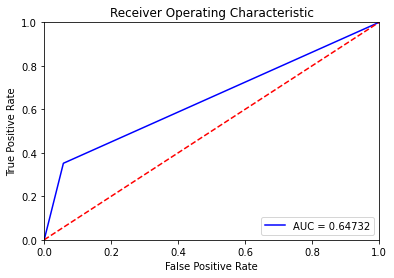

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_over_RF =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_over_RF)
print(Auc_clf_RFE_RF_selection_over_RF)

0.6722837533179443


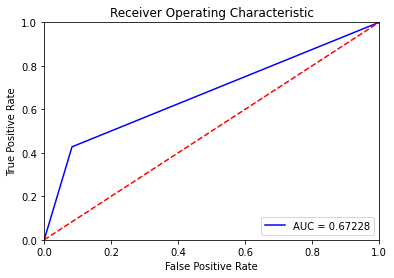

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_over_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTE_RF =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_RF )
print(Auc_clf_RFE_RF_selection_SMOTE_RF)

0.6613239098791907


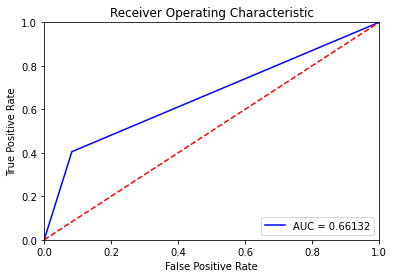

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTETomek_RF =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_RF)
print(Auc_clf_RFE_RF_selection_SMOTETomek_RF)

0.6665244153097227


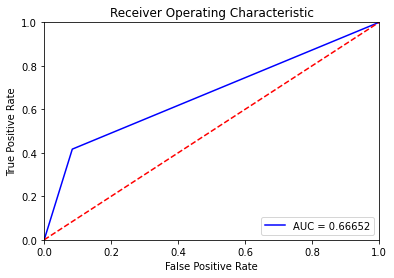

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTE_Oss_RF =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_RF)
print(Auc_clf_RFE_RF_selection_SMOTE_Oss_RF)

0.6542750276852007


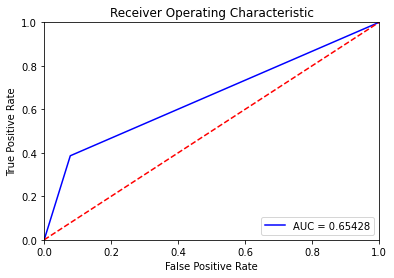

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_RF)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

2-Neural network

In [ ]:
from tensorflow.keras.metrics import AUC

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_imbalanced_NN)
Auc_clf_RFE_RF_selection_imbalanced_NN = m.result().numpy()
print(Auc_clf_RFE_RF_selection_imbalanced_NN)


0.50705326


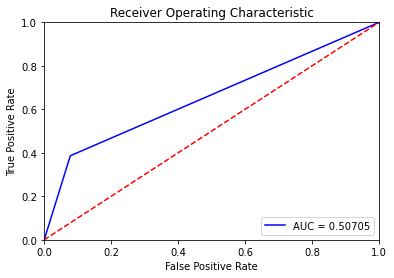

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_RFE_RF_selection_imbalanced_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_over_NN)
Auc_clf_RFE_RF_selection_over_NN = m.result().numpy()
print(Auc_clf_RFE_RF_selection_over_NN)


0.6143005


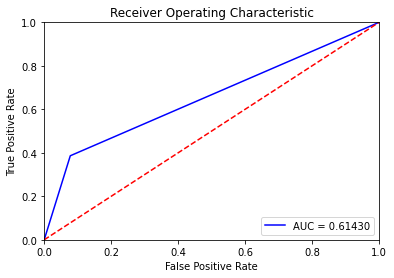

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_RFE_RF_selection_over_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_NN)
Auc_clf_RFE_RF_selection_SMOTE_NN = m.result().numpy()
print(Auc_clf_RFE_RF_selection_SMOTE_NN)


0.61472684


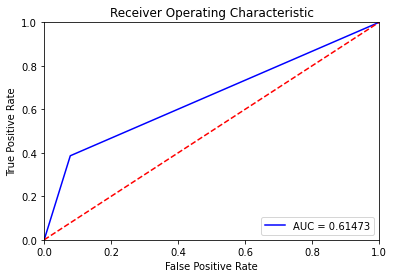

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_RFE_RF_selection_SMOTE_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTETomek_NN)
Auc_clf_RFE_RF_selection_SMOTETomek_NN = m.result().numpy()
print(Auc_clf_RFE_RF_selection_SMOTETomek_NN)


0.5678441


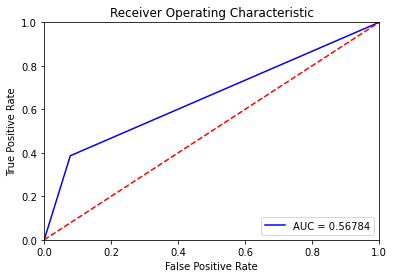

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_RFE_RF_selection_SMOTETomek_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
m = AUC()
m.update_state(testing_set_y , y_pred_clf_RFE_RF_selection_SMOTE_Oss_NN)
Auc_clf_RFE_RF_selection_SMOTE_Oss_NN = m.result().numpy()
print(Auc_clf_RFE_RF_selection_SMOTE_Oss_NN)


0.6044314


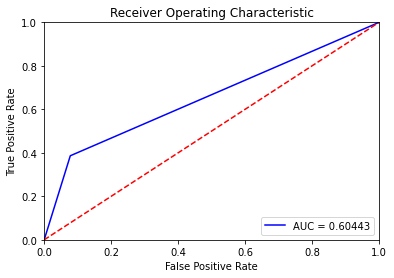

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % Auc_clf_RFE_RF_selection_SMOTE_Oss_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3-XGBoost

In [ ]:
Auc_clf_RFE_RF_selection_imbalanced_XGB = roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_XGB)
print(Auc_clf_RFE_RF_selection_imbalanced_XGB)

0.6377401132718566


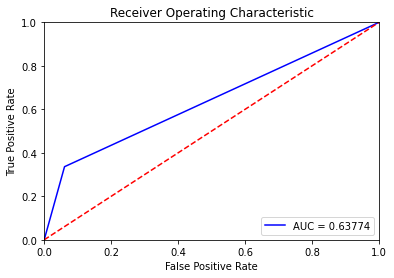

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_over_XGB =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_over_XGB)
print(Auc_clf_RFE_RF_selection_over_XGB)

0.685044444038333


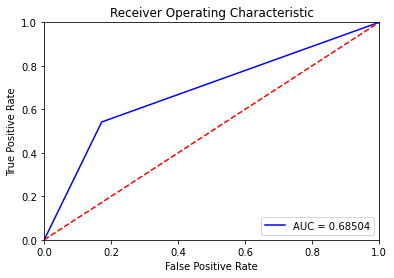

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_over_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTE_XGB =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_XGB )
print(Auc_clf_RFE_RF_selection_SMOTE_XGB)

0.6499586934131


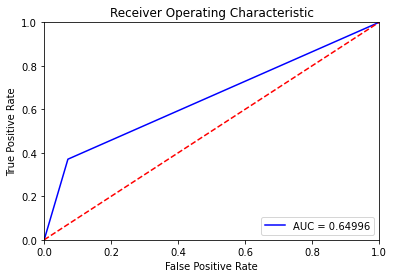

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTETomek_XGB =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_XGB)
print(Auc_clf_RFE_RF_selection_SMOTETomek_XGB)

0.6472975480638273


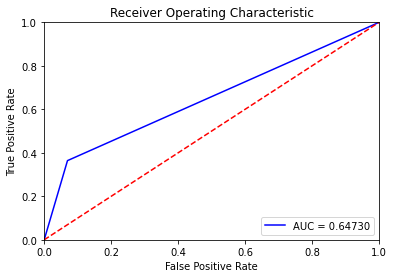

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTE_Oss_XGB =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_XGB)
print(Auc_clf_RFE_RF_selection_SMOTE_Oss_XGB)

0.6479378597532122


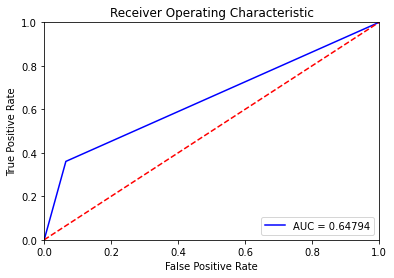

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_XGB)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

4-Logistic Regression

In [ ]:
Auc_clf_RFE_RF_selection_imbalanced_LR = roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_LR)
print(Auc_clf_RFE_RF_selection_imbalanced_LR)

0.49992888636040395


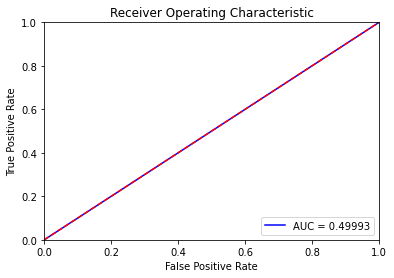

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_imbalanced_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_over_LR =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_over_LR)
print(Auc_clf_RFE_RF_selection_over_LR)

0.6006797582699672


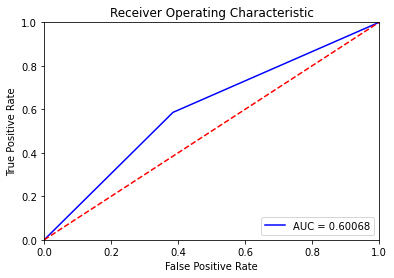

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_over_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTE_LR =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_LR)
print(Auc_clf_RFE_RF_selection_SMOTE_LR)

0.5996032660699671


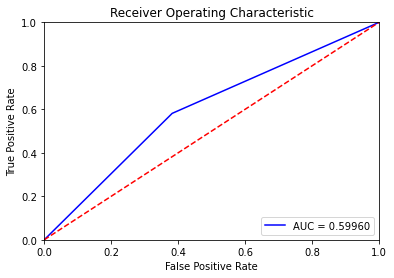

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTETomek_LR =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_LR)
print(Auc_clf_RFE_RF_selection_SMOTETomek_LR)

0.6109920666938313


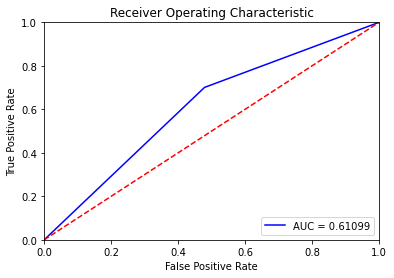

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTETomek_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Auc_clf_RFE_RF_selection_SMOTE_Oss_LR =roc_auc_score(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_LR)
print(Auc_clf_RFE_RF_selection_SMOTE_Oss_LR)

0.6135340271722725


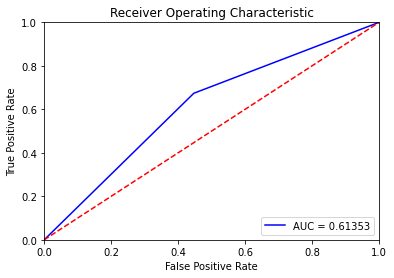

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_set_y, y_pred_clf_RFE_RF_selection_SMOTE_Oss_LR)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
data = {'Models':  ['RF—imbalanced ', 'RF—RandOverSampling', 'RF—SMOTE' , 'RF—SMOTETomek' , 'RF—SMOTEOss' ,

                   'NN—imbalanced ', 'NN—RandOverSampling', 'NN—SMOTE' , 'NN—SMOTETomek' , 'NN—SMOTEOss',
                    'XGB—imbalanced ', 'XGB—RandOverSampling', 'XGB—SMOTE' , 'XGB—SMOTETomek' , 'XGB—SMOTEOss' ,

                   'LR—imbalanced ', 'LR—RandOverSampling', 'LR—SMOTE' , 'LR—SMOTETomek' , 'LR—SMOTEOss'
                   ],
        'Accuracy': [round(Acc_clf_RFE_RF_selection_imbalanced_RF, 3), round(Acc_clf_RFE_RF_selection_over_RF , 3), round(Acc_clf_RFE_RF_selection_SMOTE_RF, 3),
                    round(Acc_clf_RFE_RF_selection_SMOTETomek_RF, 3) , round(Acc_clf_RFE_RF_selection_SMOTE_Oss_RF, 3) ,

                    round(Acc_clf_RFE_RF_selection_imbalanced_NN, 3), round(Acc_clf_RFE_RF_selection_over_NN , 3), round(Acc_clf_RFE_RF_selection_SMOTE_NN, 3),
                    round(Acc_clf_RFE_RF_selection_SMOTETomek_NN, 3) , round(Acc_clf_RFE_RF_selection_SMOTE_Oss_NN, 3),

                     round(Acc_clf_RFE_RF_selection_imbalanced_XGB, 3), round(Acc_clf_RFE_RF_selection_over_XGB , 3), round(Acc_clf_RFE_RF_selection_SMOTE_XGB, 3),
                    round(Acc_clf_RFE_RF_selection_SMOTETomek_XGB, 3) , round(Acc_clf_RFE_RF_selection_SMOTE_Oss_XGB, 3) ,

                     round(Acc_clf_RFE_RF_selection_imbalanced_LR, 3), round(Acc_clf_RFE_RF_selection_over_LR , 3), round(Acc_clf_RFE_RF_selection_SMOTE_LR, 3),
                    round(Acc_clf_RFE_RF_selection_SMOTETomek_LR, 3) , round(Acc_clf_RFE_RF_selection_SMOTE_Oss_LR, 3)



                    ],
         'Sensetivity' : [round(Sensitivity_clf_RFE_RF_selection_imbalanced_RF, 3) , round( Sensitivity_clf_RFE_RF_selection_over_RF, 3),
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_RF , 3) , round(Sensitivity_clf_RFE_RF_selection_SMOTETomek_RF, 3) ,
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_RF , 3) ,

                         round(Sensitivity_clf_RFE_RF_selection_imbalanced_NN, 3) , round( Sensitivity_clf_RFE_RF_selection_over_NN, 3),
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_NN , 3) , round(Sensitivity_clf_RFE_RF_selection_SMOTETomek_NN, 3) ,
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_NN , 3) ,

                          round(Sensitivity_clf_RFE_RF_selection_imbalanced_XGB, 3) , round( Sensitivity_clf_RFE_RF_selection_over_XGB, 3),
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_XGB , 3) , round(Sensitivity_clf_RFE_RF_selection_SMOTETomek_XGB, 3) ,
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_XGB , 3) ,

                          round(Sensitivity_clf_RFE_RF_selection_imbalanced_LR, 3) , round( Sensitivity_clf_RFE_RF_selection_over_LR, 3),
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_LR , 3) , round(Sensitivity_clf_RFE_RF_selection_SMOTETomek_LR, 3) ,
                         round(Sensitivity_clf_RFE_RF_selection_SMOTE_Oss_LR , 3)






                         ],
        'Specificity' : [round(Specificity_clf_RFE_RF_selection_imbalanced_RF, 3) , round(Specificity_clf_RFE_RF_selection_over_RF, 3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_RF , 3) , round(Specificity_clf_RFE_RF_selection_SMOTETomek_RF ,3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_Oss_RF , 3) ,


                        round(Specificity_clf_RFE_RF_selection_imbalanced_NN, 3) , round(Specificity_clf_RFE_RF_selection_over_NN, 3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_NN , 3) , round(Specificity_clf_RFE_RF_selection_SMOTETomek_NN ,3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_Oss_NN , 3) ,

                         round(Specificity_clf_RFE_RF_selection_imbalanced_XGB, 3) , round(Specificity_clf_RFE_RF_selection_over_XGB, 3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_XGB , 3) , round(Specificity_clf_RFE_RF_selection_SMOTETomek_XGB ,3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_Oss_XGB , 3) ,

                         round(Specificity_clf_RFE_RF_selection_imbalanced_LR, 3) , round(Specificity_clf_RFE_RF_selection_over_LR, 3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_LR , 3) , round(Specificity_clf_RFE_RF_selection_SMOTETomek_LR ,3) ,
                        round(Specificity_clf_RFE_RF_selection_SMOTE_Oss_LR , 3)






                        ],
        'AUC' : [round(Auc_clf_RFE_RF_selection_imbalanced_RF, 3)  , round(Auc_clf_RFE_RF_selection_over_RF, 3) , round(Auc_clf_RFE_RF_selection_SMOTE_RF , 3),
                round(Auc_clf_RFE_RF_selection_SMOTETomek_RF  , 3),round( Auc_clf_RFE_RF_selection_SMOTETomek_RF , 3) ,


                 round(Auc_clf_RFE_RF_selection_imbalanced_NN, 3)  , round(Auc_clf_RFE_RF_selection_over_NN, 3) , round(Auc_clf_RFE_RF_selection_SMOTE_NN , 3),
                round(Auc_clf_RFE_RF_selection_SMOTETomek_NN  , 3),round( Auc_clf_RFE_RF_selection_SMOTETomek_NN , 3) ,


                 round(Auc_clf_RFE_RF_selection_imbalanced_XGB, 3)  , round(Auc_clf_RFE_RF_selection_over_XGB, 3) , round(Auc_clf_RFE_RF_selection_SMOTE_XGB , 3),
                round(Auc_clf_RFE_RF_selection_SMOTETomek_XGB  , 3),round( Auc_clf_RFE_RF_selection_SMOTETomek_XGB , 3) ,


                 round(Auc_clf_RFE_RF_selection_imbalanced_LR, 3)  , round(Auc_clf_RFE_RF_selection_over_LR, 3) , round(Auc_clf_RFE_RF_selection_SMOTE_LR , 3),
                round(Auc_clf_RFE_RF_selection_SMOTETomek_LR  , 3),round( Auc_clf_RFE_RF_selection_SMOTETomek_LR , 3) ,









                ]
        }

df = pd.DataFrame(data)

print(df)

                  Models  Accuracy  Sensetivity  Specificity    AUC
0         RF—imbalanced      0.813        0.632        0.943  0.647
1    RF—RandOverSampling     0.810        0.590        0.917  0.672
2               RF—SMOTE     0.805        0.579        0.917  0.661
3          RF—SMOTETomek     0.807        0.582        0.916  0.667
4            RF—SMOTEOss     0.805        0.581        0.922  0.667
5         NN—imbalanced      0.781        0.000        1.000  0.507
6    NN—RandOverSampling     0.657        0.484        0.706  0.614
7               NN—SMOTE     0.584        0.594        0.581  0.615
8          NN—SMOTETomek     0.572        0.552        0.578  0.568
9            NN—SMOTEOss     0.592        0.589        0.593  0.568
10       XGB—imbalanced      0.807        0.608        0.939  0.638
11  XGB—RandOverSampling     0.766        0.469        0.828  0.685
12             XGB—SMOTE     0.807        0.594        0.929  0.650
13        XGB—SMOTETomek     0.807        0.595 

In [ ]:
df.style.format(formatter={('Accuracy'): "{:.3f}",
                           ('Sensetivity'): "{:,.3f}" ,  ('Specificity'): "{:,.3f}" , ('AUC'): "{:,.3f}"
                          })

,Models,Accuracy,Sensetivity,Specificity,AUC
0,RF—imbalanced,0.813,0.632,0.943,0.647
1,RF—RandOverSampling,0.810,0.590,0.917,0.672
2,RF—SMOTE,0.805,0.579,0.917,0.661
3,RF—SMOTETomek,0.807,0.582,0.916,0.667
4,RF—SMOTEOss,0.805,0.581,0.922,0.667
5,NN—imbalanced,0.781,0.000,1.000,0.507
6,NN—RandOverSampling,0.657,0.484,0.706,0.614
7,NN—SMOTE,0.584,0.594,0.581,0.615
8,NN—SMOTETomek,0.572,0.552,0.578,0.568
9,NN—SMOTEOss,0.592,0.589,0.593,0.568
